<a href="https://colab.research.google.com/github/aaronhum/MAT494/blob/main/final_project494.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis of Uber Driver Tipping Behavior

Aaron Hum - MAT 494 - Final Project

## Introduction

### Uber

Uber is a popular ride hailing, on-call taxi service app. Trip fares are calculated algorithmically through a dynamic pricing model paid to the driver where Uber takes a percentage. Then, after the ride, the rider chooses an amount they want to tip their driver.

### Ride Variables and Tipping Behavior

Several variables go into a ride. First there is the circumstances of the trip itself including the day of the week, date, and time.
Then there is the matter of the price of the trip, which is further broken down into fees for distance, time, wait time, surge pricing, promotional pricing, rewards pricing, long pickup fees, and cleaning fees.
And finally there is tipping amount. This is the voluntary choice of the rider and (may) be affected by the previously mentioned variables.

### Questions

Do the various circumstances of the ride, such as day of the week, date, or time of day, affect tip amount? Do riders tip more in the evening? On weekends?

Do the trip fares affect tip amount? Do riders tip more for longer/shorter distance trips? Do riders who experience extra fees (surge pricing, cleaning fee) tip less?

Do the given variables provide enough information to predict tipping behavior using data science models?

### Data Source

I will use this dataset of Uber rides in Phoenix, AZ:

https://www.kaggle.com/datasets/procurator/55-weeks-of-uber-rides-in-phoenix-az?resource=download


## Models and Numerical Methods

Linear Regression, Multiple Linear Regression, Logistic Regression

The Multiple Linear regrssion model will measure the tip amount, in the equation: 

Y = Tip

X[1-18] = ['Base Fare','Distance','Time','Min Fare Supplement','Cancellation','Surge','Diamond Reward','Promotions','Total','Long Pickup Fee','Optio0l Insurance','Consecutive Trips Promotion','Share Adjustment','Quest Promotion','Fare Adjustment','Platinum Reward','Cleaning Repairs']


B0 = Intercept, Bn = Slope of the regression line for each variable, e = error

Y = B0 + B1X1 + B2X2 + ... + B18X18 + e

## Expectations

I expect that riders tip more on weekends and in the evening. I hypothesize that these riders are those coming back from a social outing, which may make them more susceptible to tipping higher amounts.

I expect higher fares, higher distance, and extra fees to all cause lower tips. This is due to the fact that that these trips already cost more, thus making the rider likely to tip less.

Finally, I expect that the data will be too varied and uncorrelated  for the multiple linear regression or logistic regression models to produce accurate predictions.


## Python Libraries in this Project

numpy: Numerical computations

pandas: Data manipulation

matplotlib: Data visualization

seaborn: Statistical data visualization

sklearn: Regression, machine learning, data analysis

In [255]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading the Dataset

Upload 'phoenix_uber_trips.csv' from the data source.

In [256]:
# upload 'phoenix_uber_trips_modified.csv' 
# "modified" refers to the modifications I did to the data including replacing "NA" values with $0
from google.colab import files
uploaded = files.upload()

Saving phoenix_uber_trips_modified.csv to phoenix_uber_trips_modified (2).csv


In [257]:
dataset = pd.read_csv("phoenix_uber_trips_modified.csv")
dataset

,Driver 0me,Phone Number,Email,Date/Time,Trip ID,Type,Base Fare,Distance,Time,Min Fare Supplement,...,Promotions,Total,Long Pickup Fee,Optio0l Insurance,Consecutive Trips Promotion,Share Adjustment,Quest Promotion,Fare Adjustment,Platinum Reward,Cleaning Repairs
0,John Doe,0,jd@jd.com,"Thursday, April 18, 2019 10:24 PM",9bce9679-2755-4c90-9689-f2de69c8f817,UberX,0.3,0.97,0.68,0.68,...,0.0,2.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,John Doe,0,jd@jd.com,"Thursday, April 18, 2019 9:48 PM",bb83ec2b-fd4c-457d-ae92-0a216624d85b,UberX,0.3,4.10,2.09,0.00,...,0.0,9.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,John Doe,0,jd@jd.com,"Friday, April 19, 2019 8:39 PM",42450298-7f34-4f5b-8283-3415fe7f15a0,UberX,0.3,4.40,1.79,0.00,...,0.0,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,John Doe,0,jd@jd.com,"Friday, April 19, 2019 10:50 PM",6d5371a9-806f-4949-b506-edfffd985ff6,UberX,0.3,1.11,0.60,0.62,...,0.0,2.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,John Doe,0,jd@jd.com,"Wednesday, April 17, 2019 8:08 PM",aaa4e703-53af-4b54-ae35-314684a1e330,UberX,0.3,1.10,0.69,0.54,...,0.0,7.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,John Doe,0,jd@jd.com,"Saturday, September 22, 2018 6:28 PM",ffc28b2e-d7f5-4163-ba2a-1a4703c37097,UberX,0.3,10.95,1.24,0.00,...,0.0,12.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3100,John Doe,0,jd@jd.com,"Monday, September 24, 2018 5:32 PM",605fa173-7d88-4df4-9241-a9a14679cbae,UberX,0.3,0.92,0.39,1.01,...,0.0,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3101,John Doe,0,jd@jd.com,"Saturday, September 22, 2018 6:48 PM",0bc6b8a2-775f-4c72-b85b-056db73b1d86,UberX,0.3,17.39,1.95,0.00,...,0.0,22.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3102,John Doe,0,jd@jd.com,"Monday, September 24, 2018 4:54 PM",b38bc746-5dac-4e56-996c-e462070ef1d9,UberX,0.3,0.36,0.21,1.76,...,0.0,2.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Examining the Dataset

In [258]:
# Examining the dataset
dataset.shape
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Driver 0me                   3104 non-null   object 
 1   Phone Number                 3104 non-null   int64  
 2   Email                        3104 non-null   object 
 3   Date/Time                    3104 non-null   object 
 4   Trip ID                      3104 non-null   object 
 5   Type                         3104 non-null   object 
 6   Base Fare                    3104 non-null   float64
 7   Distance                     3104 non-null   float64
 8   Time                         3104 non-null   float64
 9   Min Fare Supplement          3104 non-null   float64
 10  Cancellation                 3104 non-null   float64
 11  Tip                          3104 non-null   float64
 12  Surge                        3104 non-null   float64
 13  Diamond Reward    

,Driver 0me,Phone Number,Email,Date/Time,Trip ID,Type,Base Fare,Distance,Time,Min Fare Supplement,...,Promotions,Total,Long Pickup Fee,Optio0l Insurance,Consecutive Trips Promotion,Share Adjustment,Quest Promotion,Fare Adjustment,Platinum Reward,Cleaning Repairs
0,John Doe,0,jd@jd.com,"Thursday, April 18, 2019 10:24 PM",9bce9679-2755-4c90-9689-f2de69c8f817,UberX,0.3,0.97,0.68,0.68,...,0.0,2.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,John Doe,0,jd@jd.com,"Thursday, April 18, 2019 9:48 PM",bb83ec2b-fd4c-457d-ae92-0a216624d85b,UberX,0.3,4.10,2.09,0.00,...,0.0,9.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,John Doe,0,jd@jd.com,"Friday, April 19, 2019 8:39 PM",42450298-7f34-4f5b-8283-3415fe7f15a0,UberX,0.3,4.40,1.79,0.00,...,0.0,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,John Doe,0,jd@jd.com,"Friday, April 19, 2019 10:50 PM",6d5371a9-806f-4949-b506-edfffd985ff6,UberX,0.3,1.11,0.60,0.62,...,0.0,2.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,John Doe,0,jd@jd.com,"Wednesday, April 17, 2019 8:08 PM",aaa4e703-53af-4b54-ae35-314684a1e330,UberX,0.3,1.10,0.69,0.54,...,0.0,7.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding columns for Morning vs Evening, Day, and Weekend

In [259]:
# Functions to create the new columns
def GetMorningOrEvening(row): 
  # print(row['Date/Time'].__contains__('AM'))
  # return 'test'
  if 'AM' in row['Date/Time']:
    return 'Morning'
  return 'Evening'

def GetDay(row):
  # print(row['Date/Time'].__contains__('Monday'))
  # return 'test'
  if 'Monday' in row['Date/Time']:
    return 'Monday'
  elif 'Tuesday' in row['Date/Time']:
    return 'Tuesday'
  elif 'Wednesday' in row['Date/Time']:
    return 'Wednesday'
  elif 'Thursday' in row['Date/Time']:
    return 'Thursday'
  elif 'Saturday' in row['Date/Time']:
    return 'Saturday'
  elif 'Saturday' in row['Date/Time']:
    return 'Saturday'
  return 'Sunday'

def GetWeekend(row):
  if 'Friday' in row['Date/Time'] or 'Saturday' in row['Date/Time'] or 'Sunday' in row['Date/Time']:
    return "Weekend"
  return "Weekday"    

In [260]:
# Using the functions to create new columns
dataset['Morning or Evening'] = dataset.apply(lambda row: GetMorningOrEvening(row), axis=1)
dataset['Day of the Week'] = dataset.apply(lambda row: GetDay(row), axis=1)
dataset['Weekend'] = dataset.apply(lambda row: GetWeekend(row), axis=1)

dataset

,Driver 0me,Phone Number,Email,Date/Time,Trip ID,Type,Base Fare,Distance,Time,Min Fare Supplement,...,Optio0l Insurance,Consecutive Trips Promotion,Share Adjustment,Quest Promotion,Fare Adjustment,Platinum Reward,Cleaning Repairs,Morning or Evening,Day of the Week,Weekend
0,John Doe,0,jd@jd.com,"Thursday, April 18, 2019 10:24 PM",9bce9679-2755-4c90-9689-f2de69c8f817,UberX,0.3,0.97,0.68,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Thursday,Weekday
1,John Doe,0,jd@jd.com,"Thursday, April 18, 2019 9:48 PM",bb83ec2b-fd4c-457d-ae92-0a216624d85b,UberX,0.3,4.10,2.09,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Thursday,Weekday
2,John Doe,0,jd@jd.com,"Friday, April 19, 2019 8:39 PM",42450298-7f34-4f5b-8283-3415fe7f15a0,UberX,0.3,4.40,1.79,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Sunday,Weekend
3,John Doe,0,jd@jd.com,"Friday, April 19, 2019 10:50 PM",6d5371a9-806f-4949-b506-edfffd985ff6,UberX,0.3,1.11,0.60,0.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Sunday,Weekend
4,John Doe,0,jd@jd.com,"Wednesday, April 17, 2019 8:08 PM",aaa4e703-53af-4b54-ae35-314684a1e330,UberX,0.3,1.10,0.69,0.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Wednesday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,John Doe,0,jd@jd.com,"Saturday, September 22, 2018 6:28 PM",ffc28b2e-d7f5-4163-ba2a-1a4703c37097,UberX,0.3,10.95,1.24,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Saturday,Weekend
3100,John Doe,0,jd@jd.com,"Monday, September 24, 2018 5:32 PM",605fa173-7d88-4df4-9241-a9a14679cbae,UberX,0.3,0.92,0.39,1.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Monday,Weekday
3101,John Doe,0,jd@jd.com,"Saturday, September 22, 2018 6:48 PM",0bc6b8a2-775f-4c72-b85b-056db73b1d86,UberX,0.3,17.39,1.95,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Saturday,Weekend
3102,John Doe,0,jd@jd.com,"Monday, September 24, 2018 4:54 PM",b38bc746-5dac-4e56-996c-e462070ef1d9,UberX,0.3,0.36,0.21,1.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,Monday,Weekday


## Basic Plots, Data Visualization and Analysis

Using matplotlib and seaborn, I create several plots showing different aspects of the data.

### Boxplots

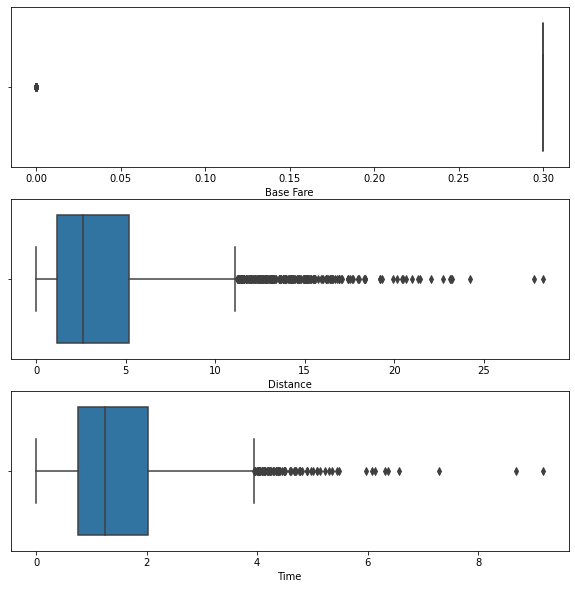

In [261]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt1 = sns.boxplot(x = dataset['Base Fare'], ax = axs[0])
plt2 = sns.boxplot(x = dataset['Distance'], ax = axs[1])
plt3 = sns.boxplot(x = dataset['Time'], ax = axs[2])

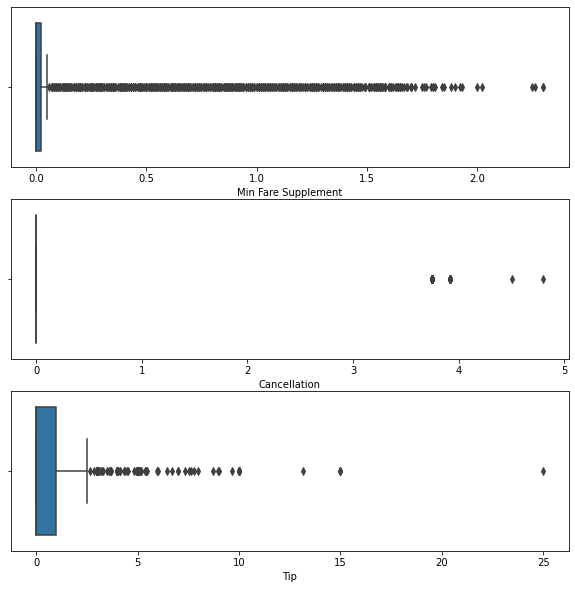

In [262]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt4 = sns.boxplot(x = dataset['Min Fare Supplement'], ax = axs[0])
plt5 = sns.boxplot(x = dataset['Cancellation'], ax = axs[1])
plt6 = sns.boxplot(x = dataset['Tip'], ax = axs[2])

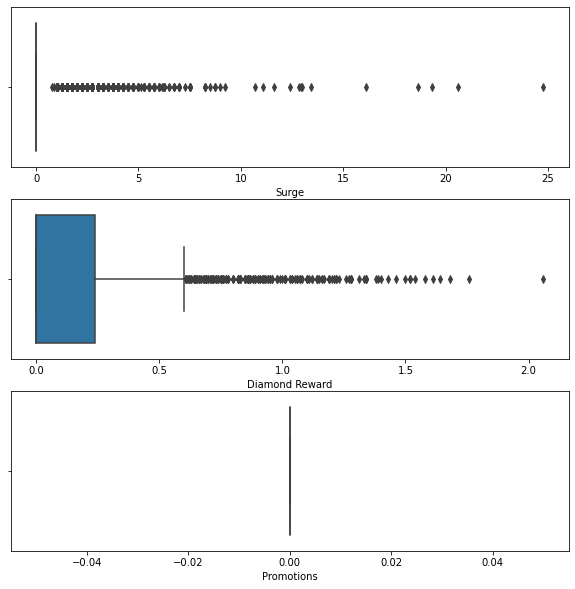

In [263]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt7 = sns.boxplot(x = dataset['Surge'], ax = axs[0])
plt8 = sns.boxplot(x = dataset['Diamond Reward'], ax = axs[1])
plt9 = sns.boxplot(x = dataset['Promotions'], ax = axs[2])

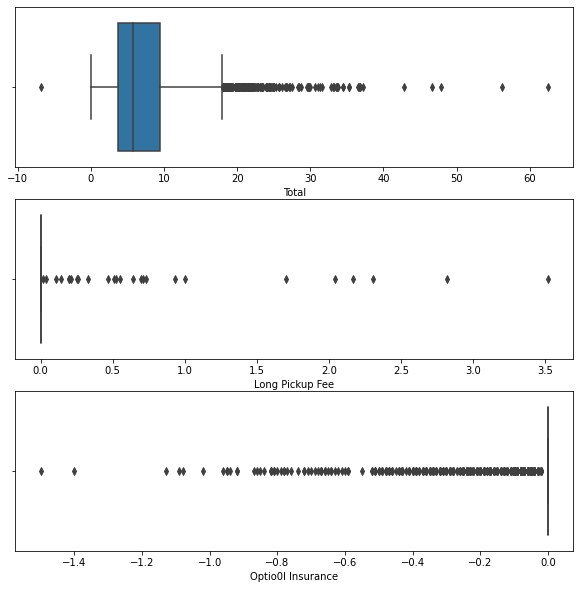

In [264]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt10 = sns.boxplot(x = dataset['Total'], ax = axs[0])
plt11 = sns.boxplot(x = dataset['Long Pickup Fee'], ax = axs[1])
plt12 = sns.boxplot(x = dataset['Optio0l Insurance'], ax = axs[2])

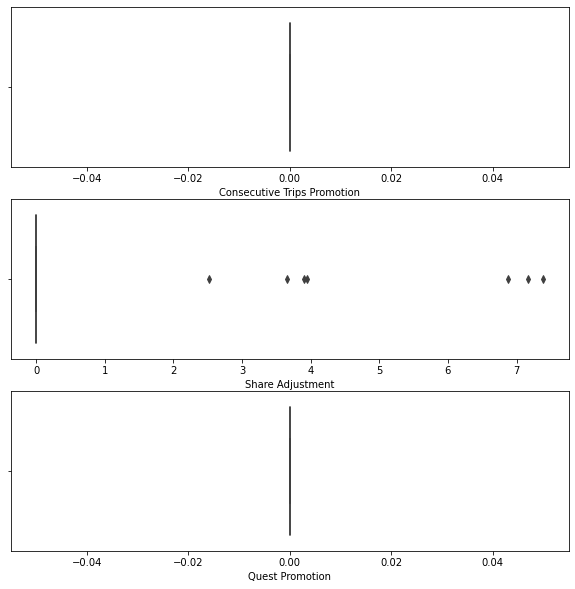

In [265]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt13 = sns.boxplot(x = dataset['Consecutive Trips Promotion'], ax = axs[0])
plt14 = sns.boxplot(x = dataset['Share Adjustment'], ax = axs[1])
plt15 = sns.boxplot(x = dataset['Quest Promotion'], ax = axs[2])

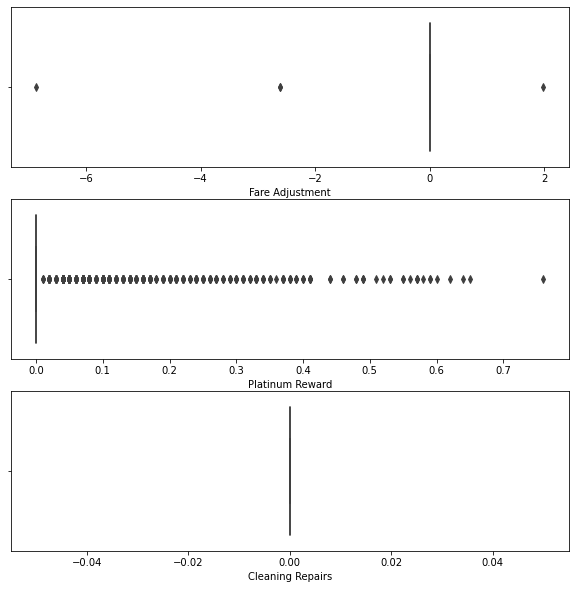

In [266]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt16 = sns.boxplot(x = dataset['Fare Adjustment'], ax = axs[0])
plt17 = sns.boxplot(x = dataset['Platinum Reward'], ax = axs[1])
plt18 = sns.boxplot(x = dataset['Cleaning Repairs'], ax = axs[2])

#### Boxplot Conclusions: 

Base Fares are mostly 0.30 with negative outliers.

Distances are positively skewed with many positive outliers.

Times are positively skewed with many positive outliers.

Min Fare Supplements are positively skewed with many positive outliers.

Cancellations are mostly zero with positive outliers.

Tips are positively skewed with many positive outliers.

Surge pricings are mostly zero with many positive outliers.

Diamond Rewards are positively skewed with positive outliers.

Promotions are all zero.

Totals are positively skewed with many positive outliers and a single negative outlier.

Long Pickup Fees are mostly zero with positive outliers.

Optional Insurance are mostly zero with negative outliers.

Consecutive Trips Promotions are all zero.

Share Ajustments are mostly zero with positive outliers.

Quest Promotions are all zero.

Fare Adjustments are mostly zero with two negative and one positive outlier

Platinum Rewards are mostly zero with marginal positive outliers.

Cleaning Repairs are all zero.

#### Irrelavent variables conclusion

We can also determine that Promotions, Consecutive Trips Promotions, Quest Promotions, and Cleaning Repairs are irrelavent because they are all zero. We can therefore ignore them for further analysis

### Histogram Plots

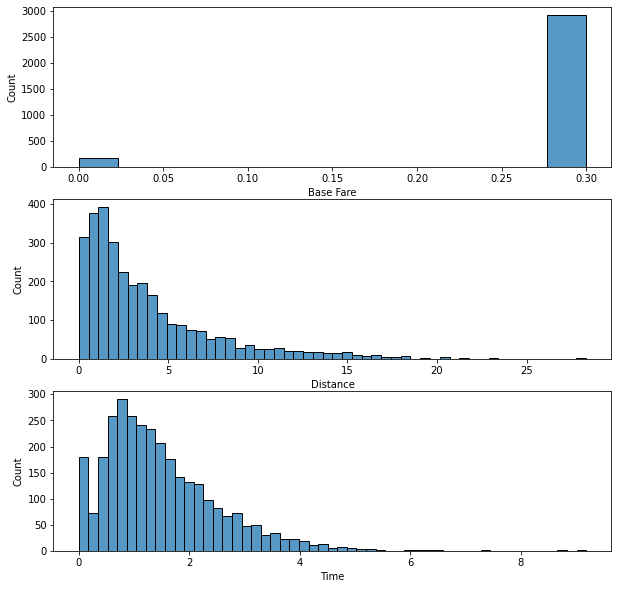

In [267]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt0 = sns.histplot(x = dataset['Base Fare'], ax = axs[0])
plt1 = sns.histplot(x = dataset['Distance'], ax = axs[1])
plt2 = sns.histplot(x = dataset['Time'], ax = axs[2])

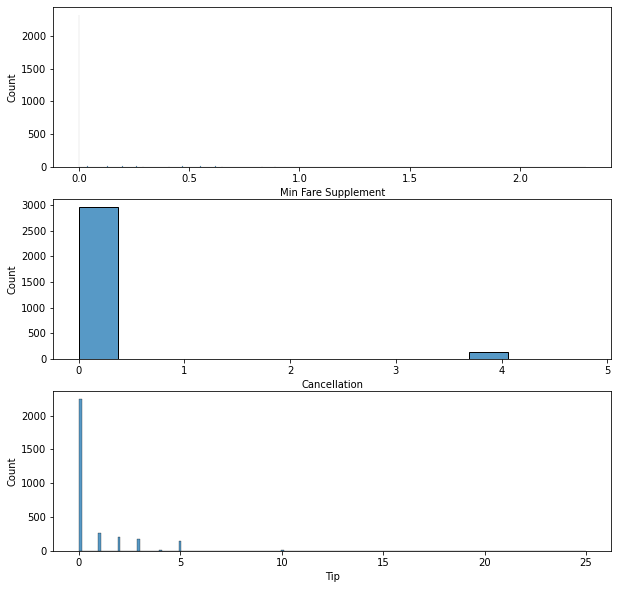

In [268]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt3 = sns.histplot(x = dataset['Min Fare Supplement'], ax = axs[0])
plt4 = sns.histplot(x = dataset['Cancellation'], ax = axs[1])
plt5 = sns.histplot(x = dataset['Tip'], ax = axs[2])

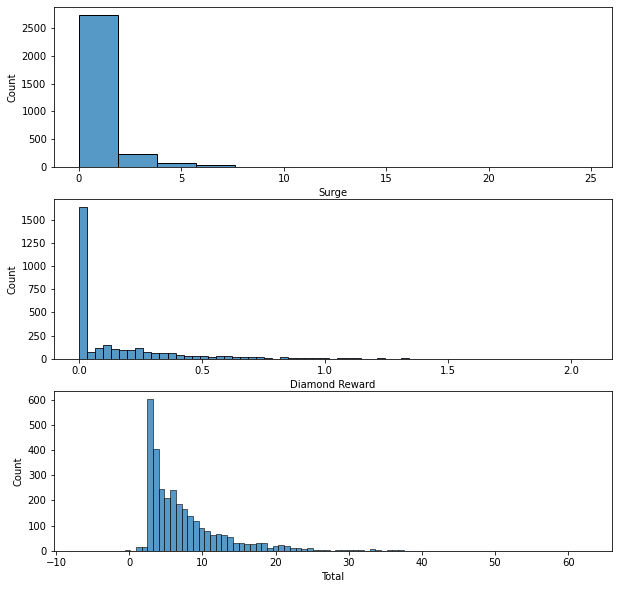

In [269]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt6 = sns.histplot(x = dataset['Surge'], ax = axs[0])
plt7 = sns.histplot(x = dataset['Diamond Reward'], ax = axs[1])
plt8 = sns.histplot(x = dataset['Total'], ax = axs[2])

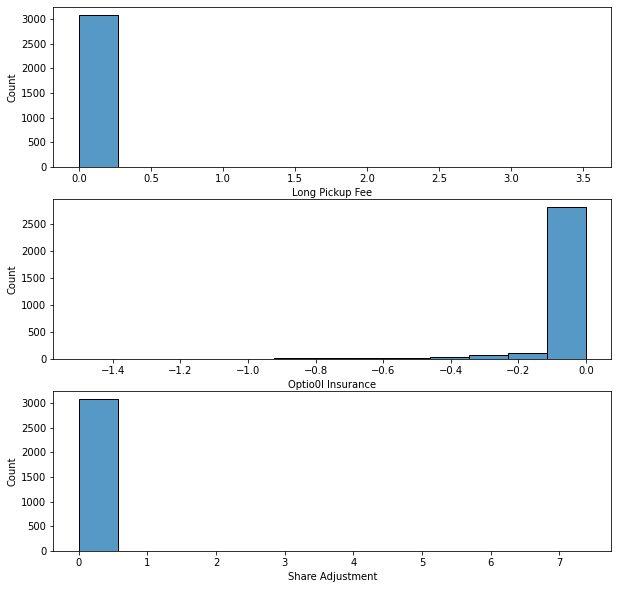

In [270]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt9 = sns.histplot(x = dataset['Long Pickup Fee'], ax = axs[0])
plt10 = sns.histplot(x = dataset['Optio0l Insurance'], ax = axs[1])
plt11 = sns.histplot(x = dataset['Share Adjustment'], ax = axs[2])

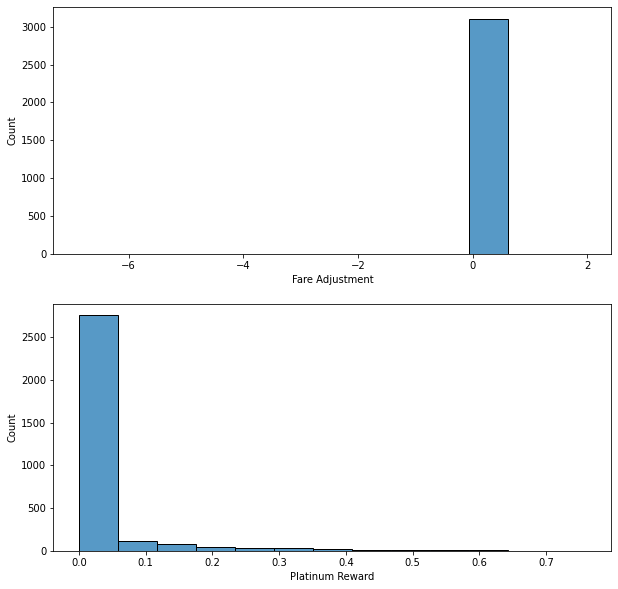

In [271]:
fig, axs = plt.subplots(2, figsize = (10,10))
plt12 = sns.histplot(x = dataset['Fare Adjustment'], ax = axs[0])
plt13 = sns.histplot(x = dataset['Platinum Reward'], ax = axs[1])

#### Histogram Conclusions:

Conclusions same as the boxplots.

#### Histograms for non-numerical data


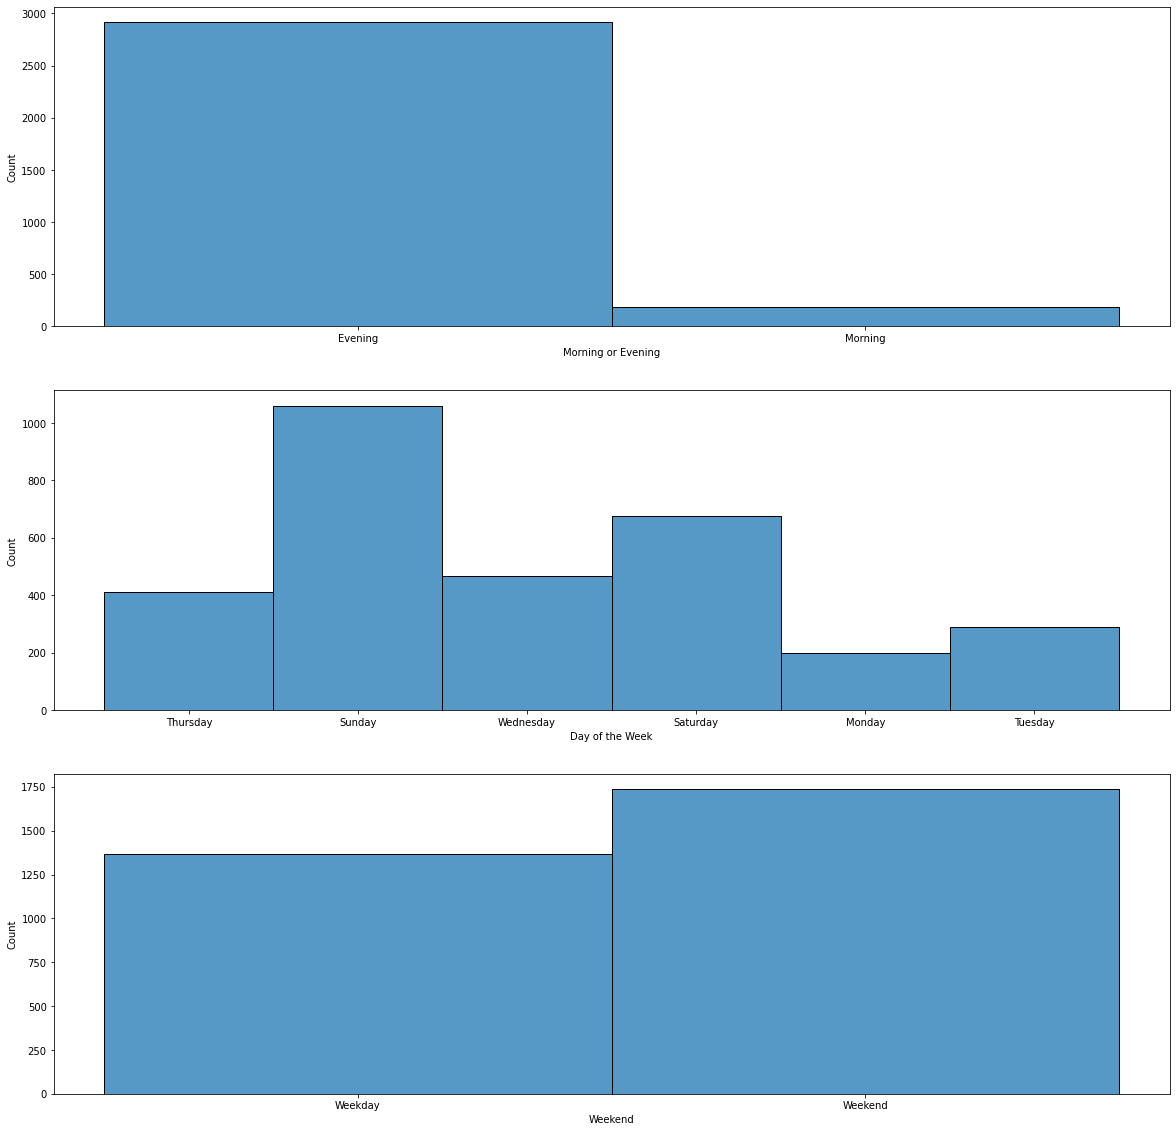

In [272]:
fig, axs = plt.subplots(3, figsize = (20,20))
plt0 = sns.histplot(x = dataset['Morning or Evening'], ax = axs[0])
plt1 = sns.histplot(x = dataset['Day of the Week'], ax = axs[1])
plt2 = sns.histplot(x = dataset['Weekend'], ax = axs[2])

### Scatter Plots

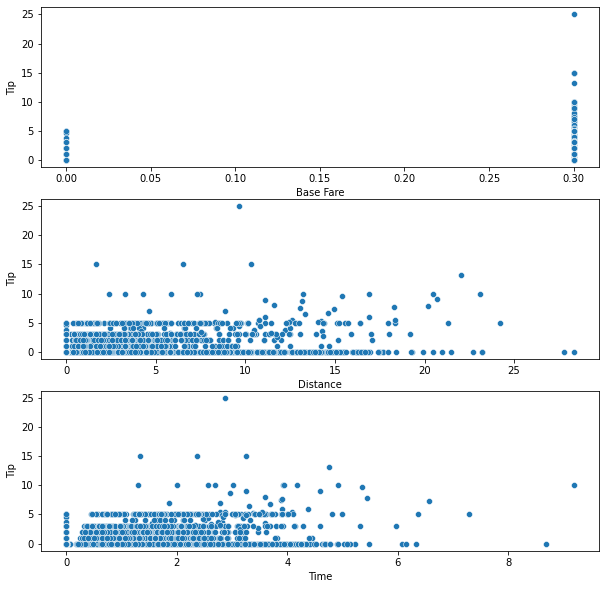

In [273]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt0 = sns.scatterplot(x = dataset['Base Fare'], y = dataset['Tip'], ax = axs[0])
plt1 = sns.scatterplot(x = dataset['Distance'], y = dataset['Tip'], ax = axs[1])
plt2 = sns.scatterplot(x = dataset['Time'], y = dataset['Tip'], ax = axs[2])

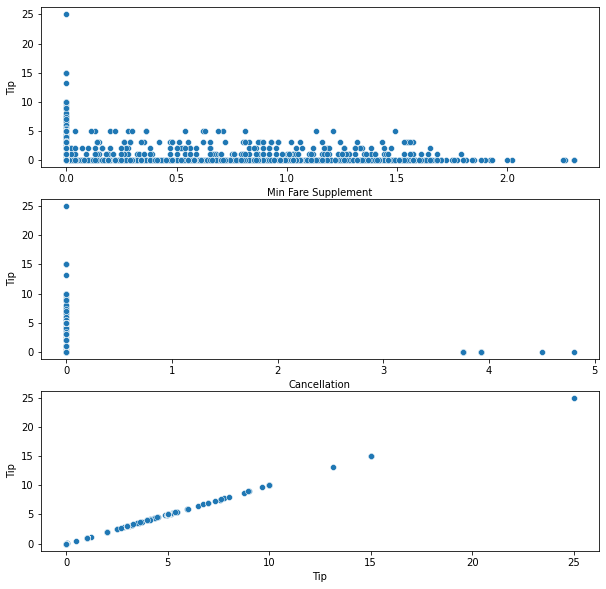

In [274]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt3 = sns.scatterplot(x = dataset['Min Fare Supplement'], y = dataset['Tip'], ax = axs[0])
plt4 = sns.scatterplot(x = dataset['Cancellation'], y = dataset['Tip'], ax = axs[1])
plt5 = sns.scatterplot(x = dataset['Tip'], y = dataset['Tip'], ax = axs[2])

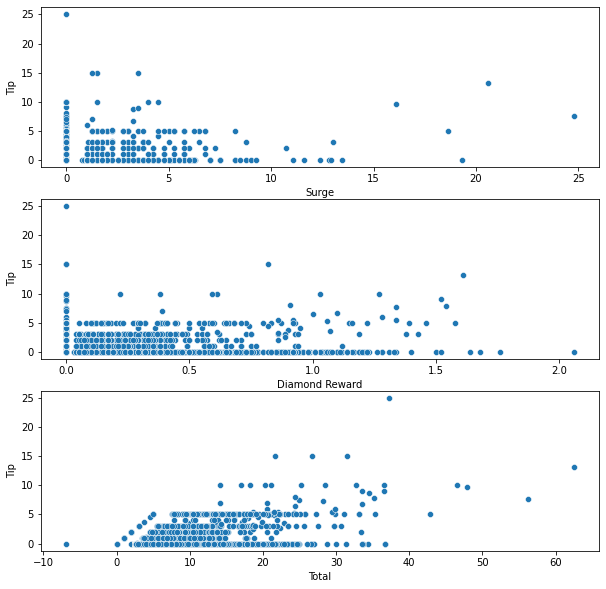

In [275]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt6 = sns.scatterplot(x = dataset['Surge'], y = dataset['Tip'], ax = axs[0])
plt7 = sns.scatterplot(x = dataset['Diamond Reward'], y = dataset['Tip'], ax = axs[1])
plt8 = sns.scatterplot(x = dataset['Total'], y = dataset['Tip'], ax = axs[2])

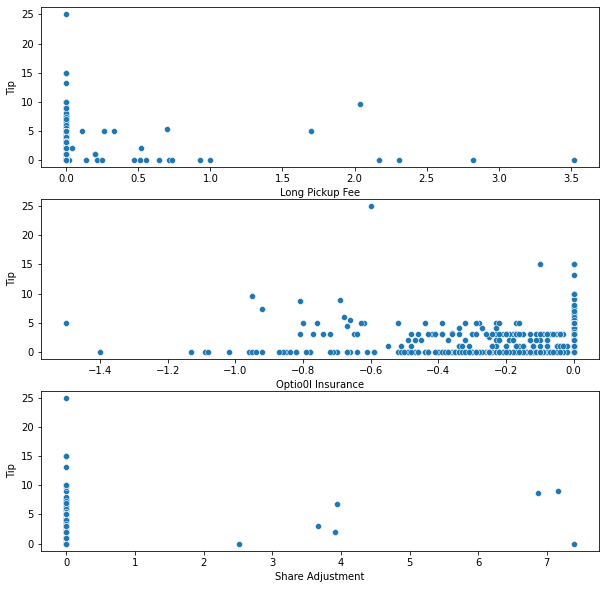

In [276]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt9 = sns.scatterplot(x = dataset['Long Pickup Fee'], y = dataset['Tip'], ax = axs[0])
plt10 = sns.scatterplot(x = dataset['Optio0l Insurance'], y = dataset['Tip'], ax = axs[1])
plt11 = sns.scatterplot(x = dataset['Share Adjustment'], y = dataset['Tip'], ax = axs[2])

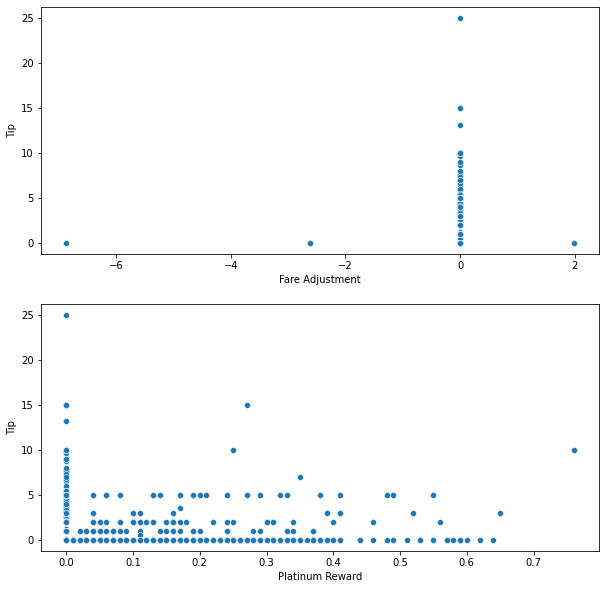

In [277]:
fig, axs = plt.subplots(2, figsize = (10,10))
plt12 = sns.scatterplot(x = dataset['Fare Adjustment'], y = dataset['Tip'], ax = axs[0])
plt13 = sns.scatterplot(x = dataset['Platinum Reward'], y = dataset['Tip'], ax = axs[1])

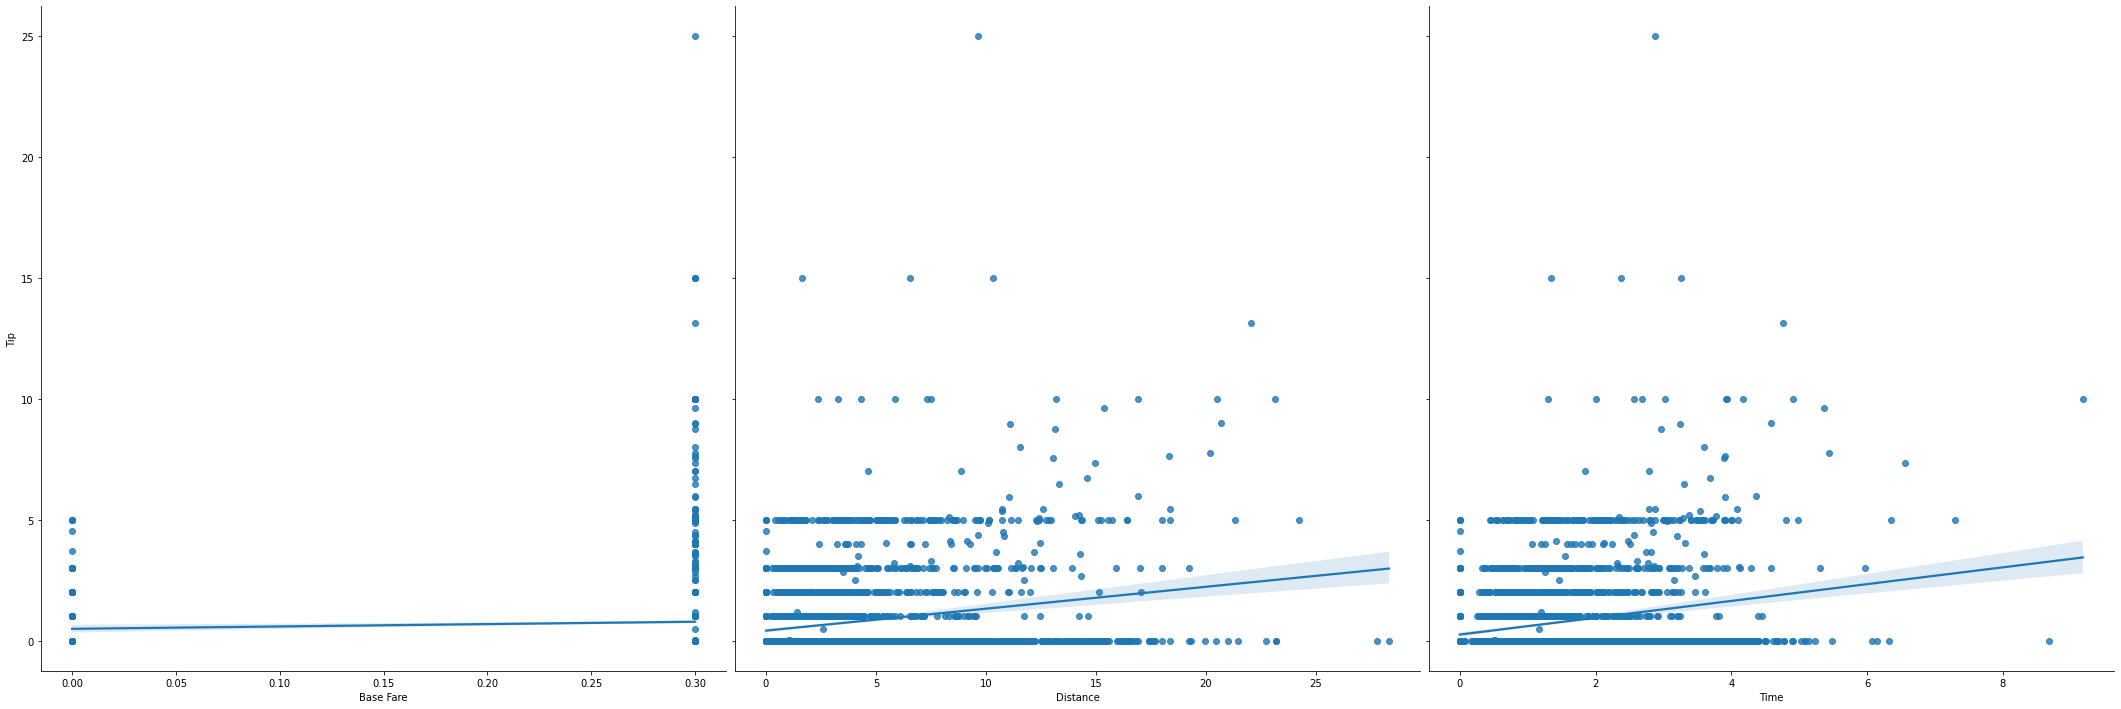

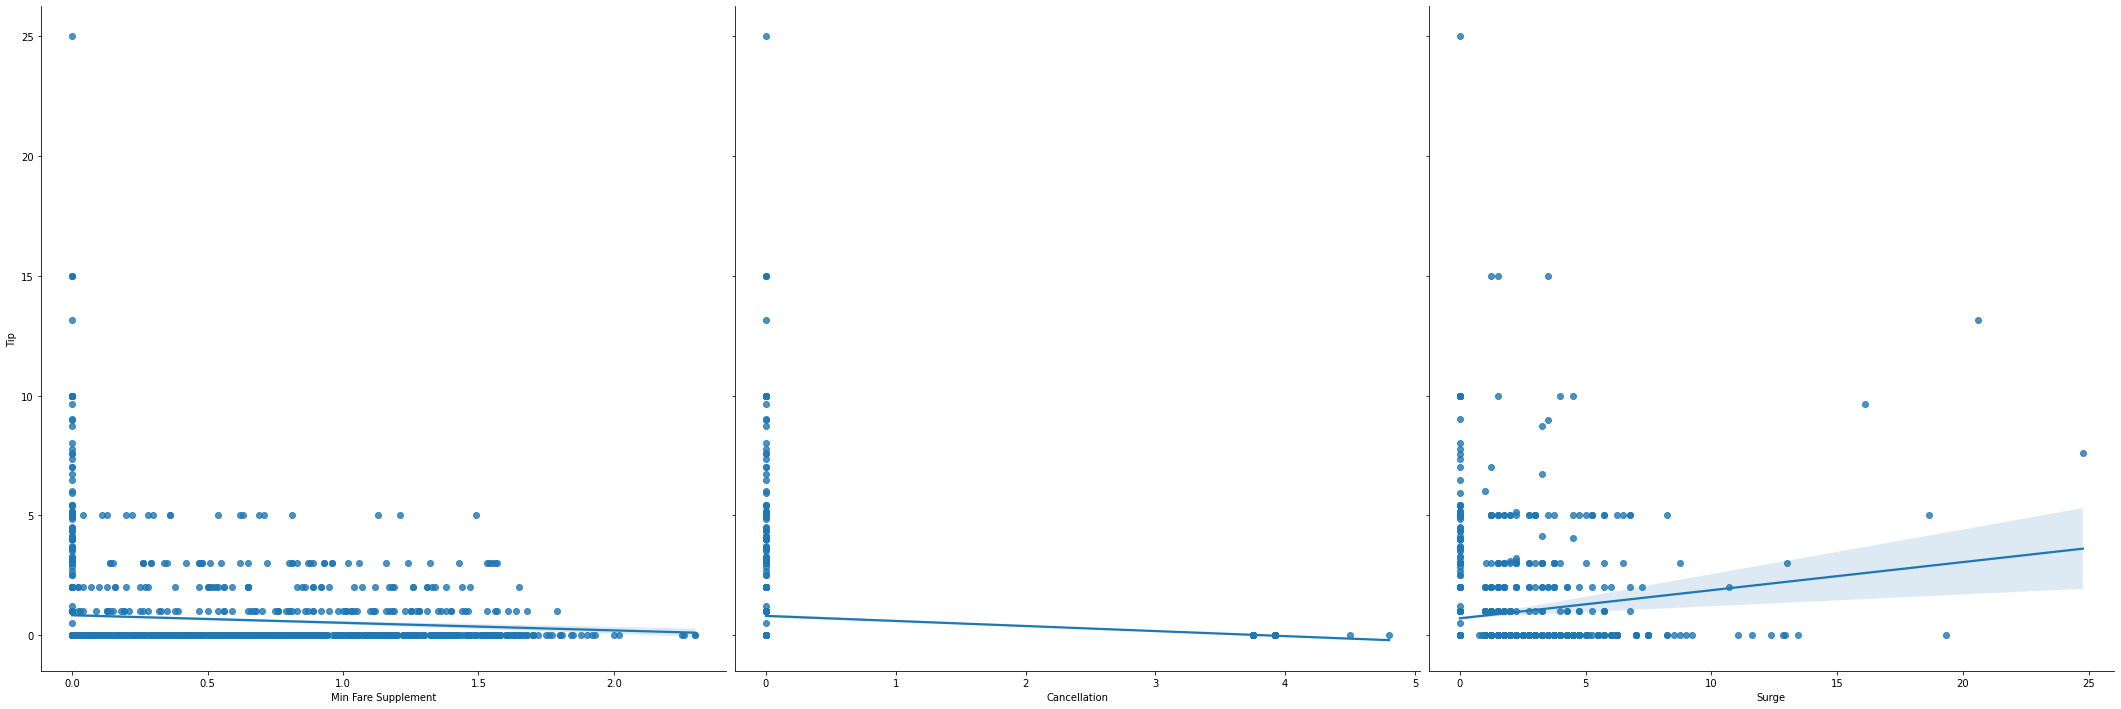

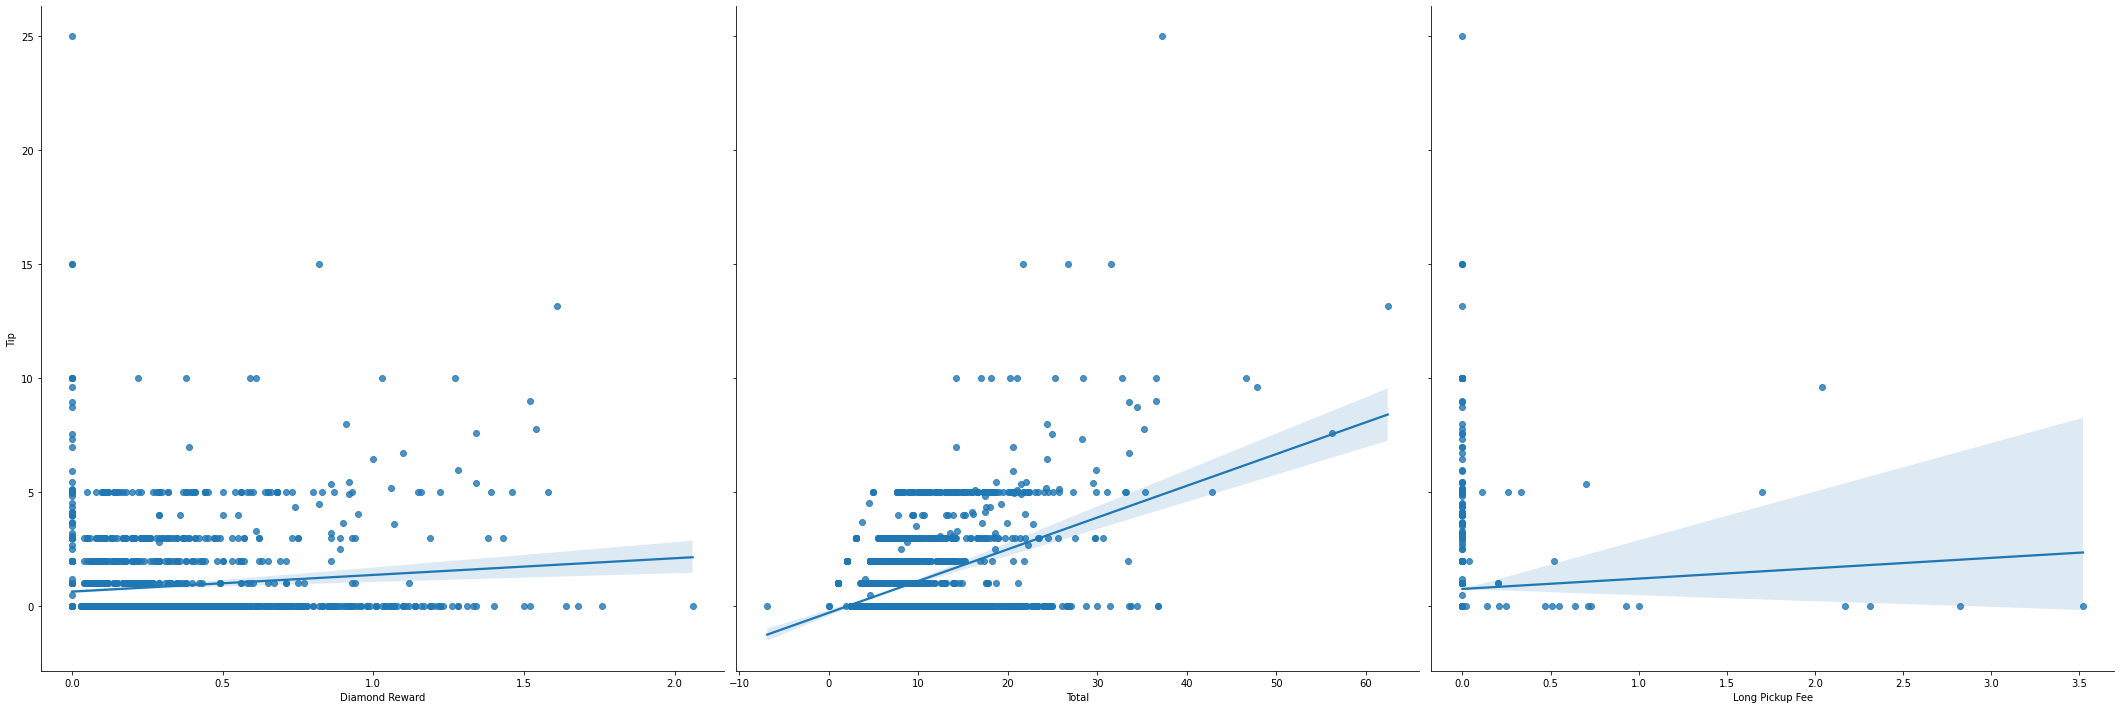

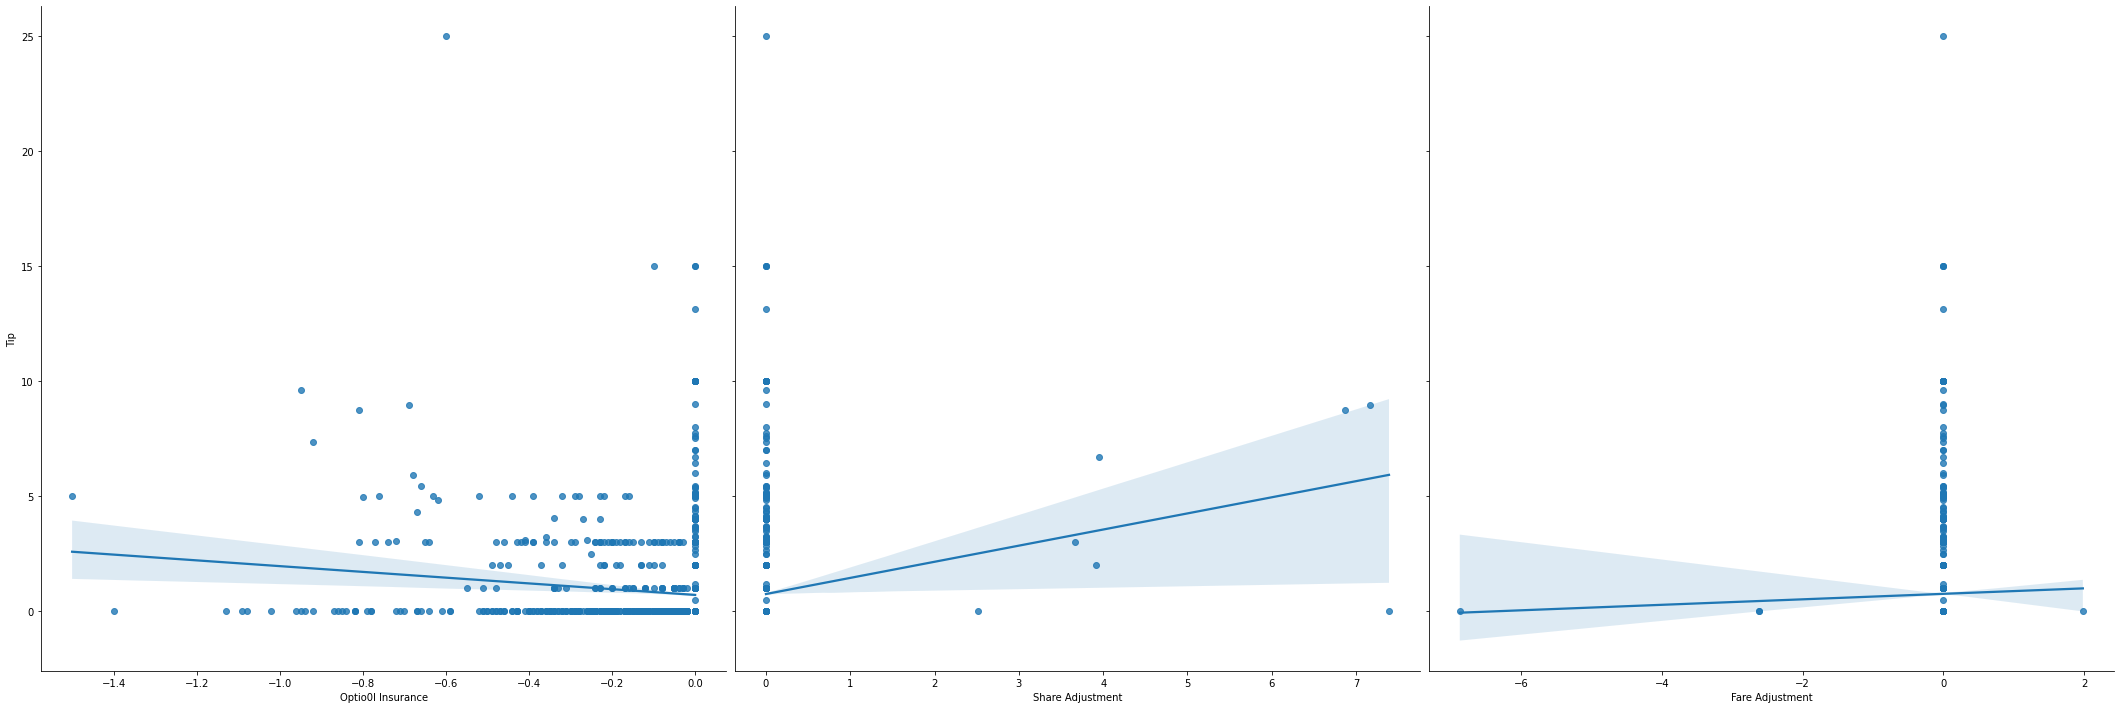

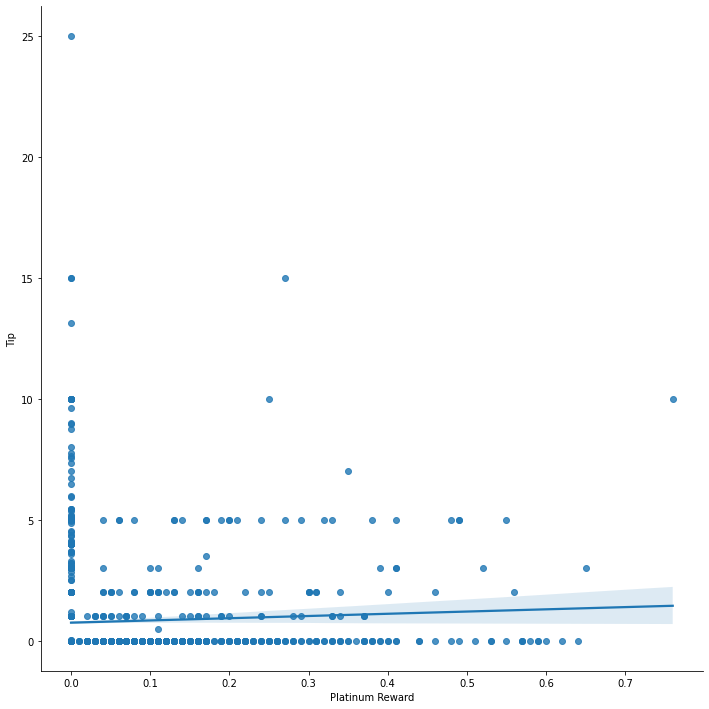

In [278]:
sns.pairplot(dataset, x_vars=['Base Fare','Distance','Time'], y_vars='Tip', height=10, aspect=1, kind='reg')
sns.pairplot(dataset, x_vars=['Min Fare Supplement','Cancellation','Surge'], y_vars='Tip', height=10, aspect=1, kind='reg')
sns.pairplot(dataset, x_vars=['Diamond Reward','Total','Long Pickup Fee'], y_vars='Tip', height=10, aspect=1, kind='reg')
sns.pairplot(dataset, x_vars=['Optio0l Insurance','Share Adjustment','Fare Adjustment'], y_vars='Tip', height=10, aspect=1, kind='reg')
sns.pairplot(dataset, x_vars=['Platinum Reward'], y_vars='Tip', height=10, aspect=1, kind='reg')

Scatterplot Conclusions: Distance, Time, Surge, Diamond Reward, Total, and Share Adjustment have a positive correlation to Tip. Min Fare Supplement, Cancellation, and Optional Insurance have a negative correlation to Tip. Base fare, Fare Adjustment, and Platinum Reward have neutral correlation or no correlation to Tip.

### Scatterplots Showing Categorical Data

#### Morning vs Evening:

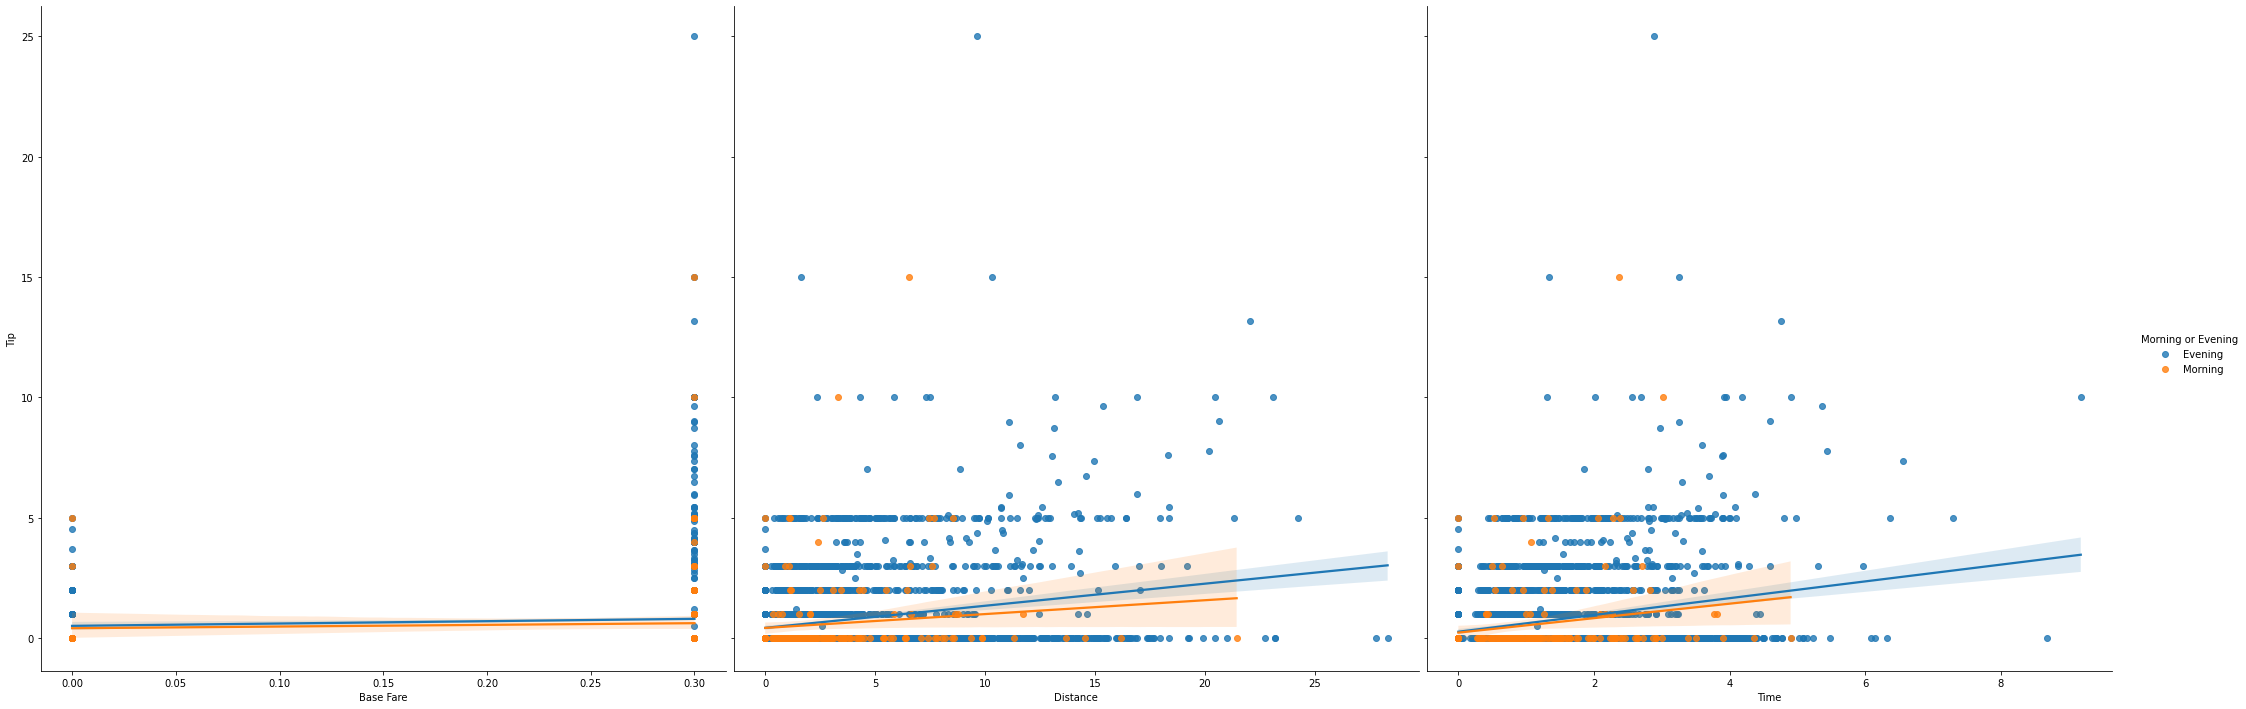

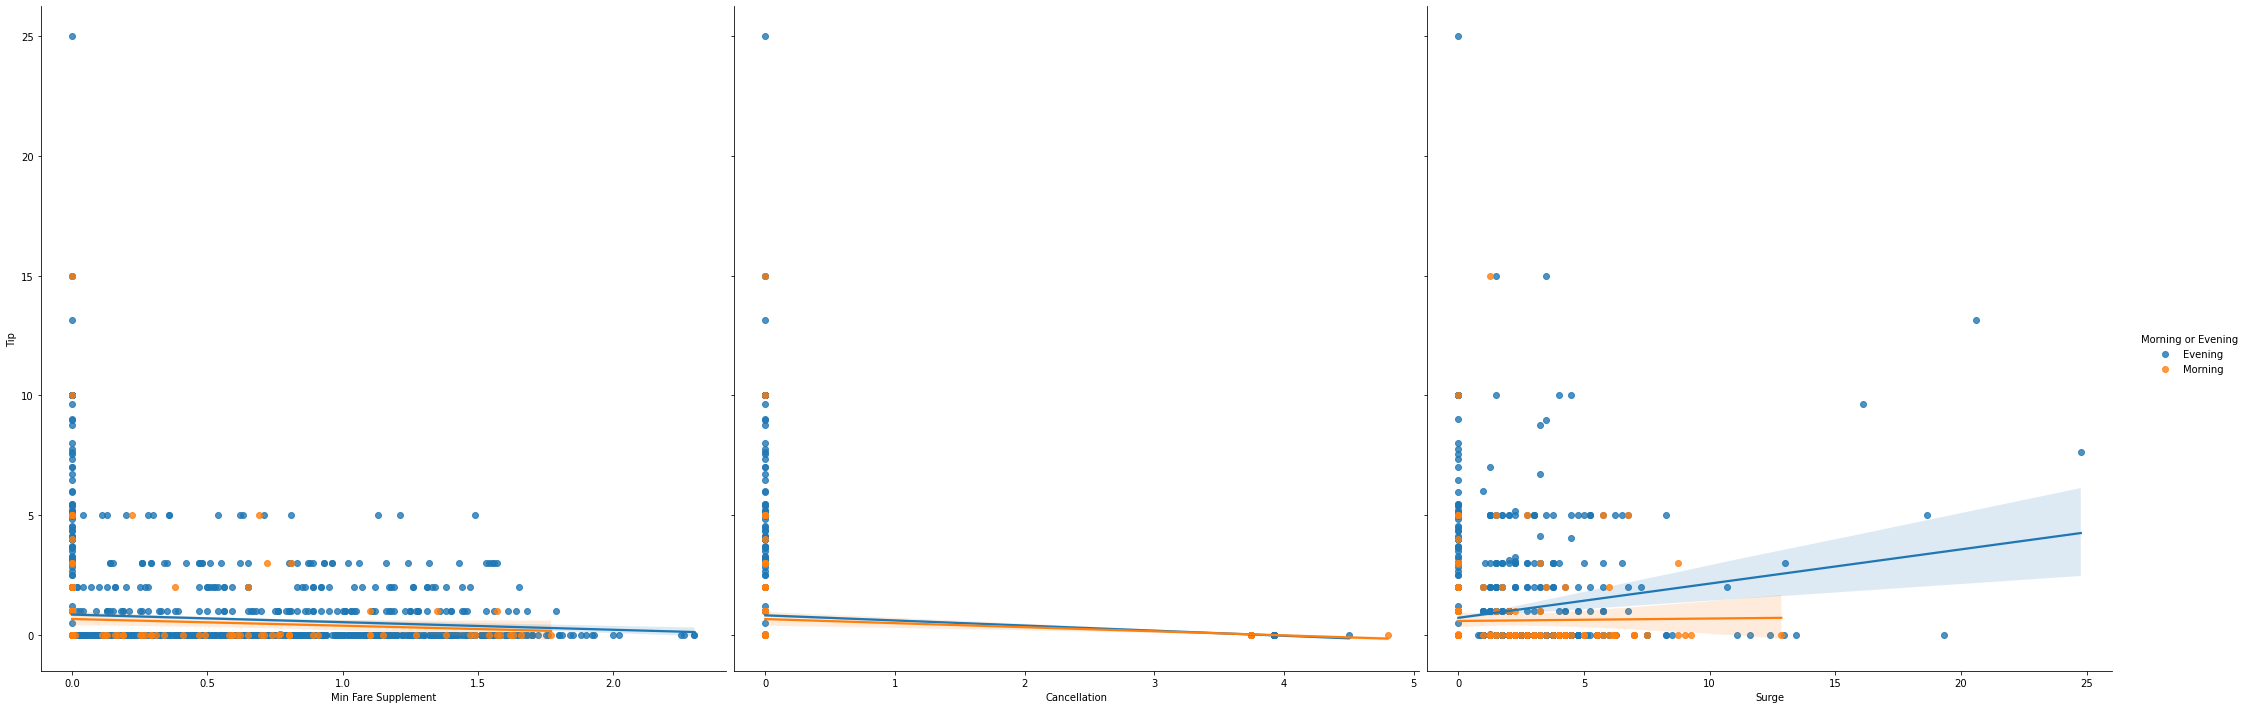

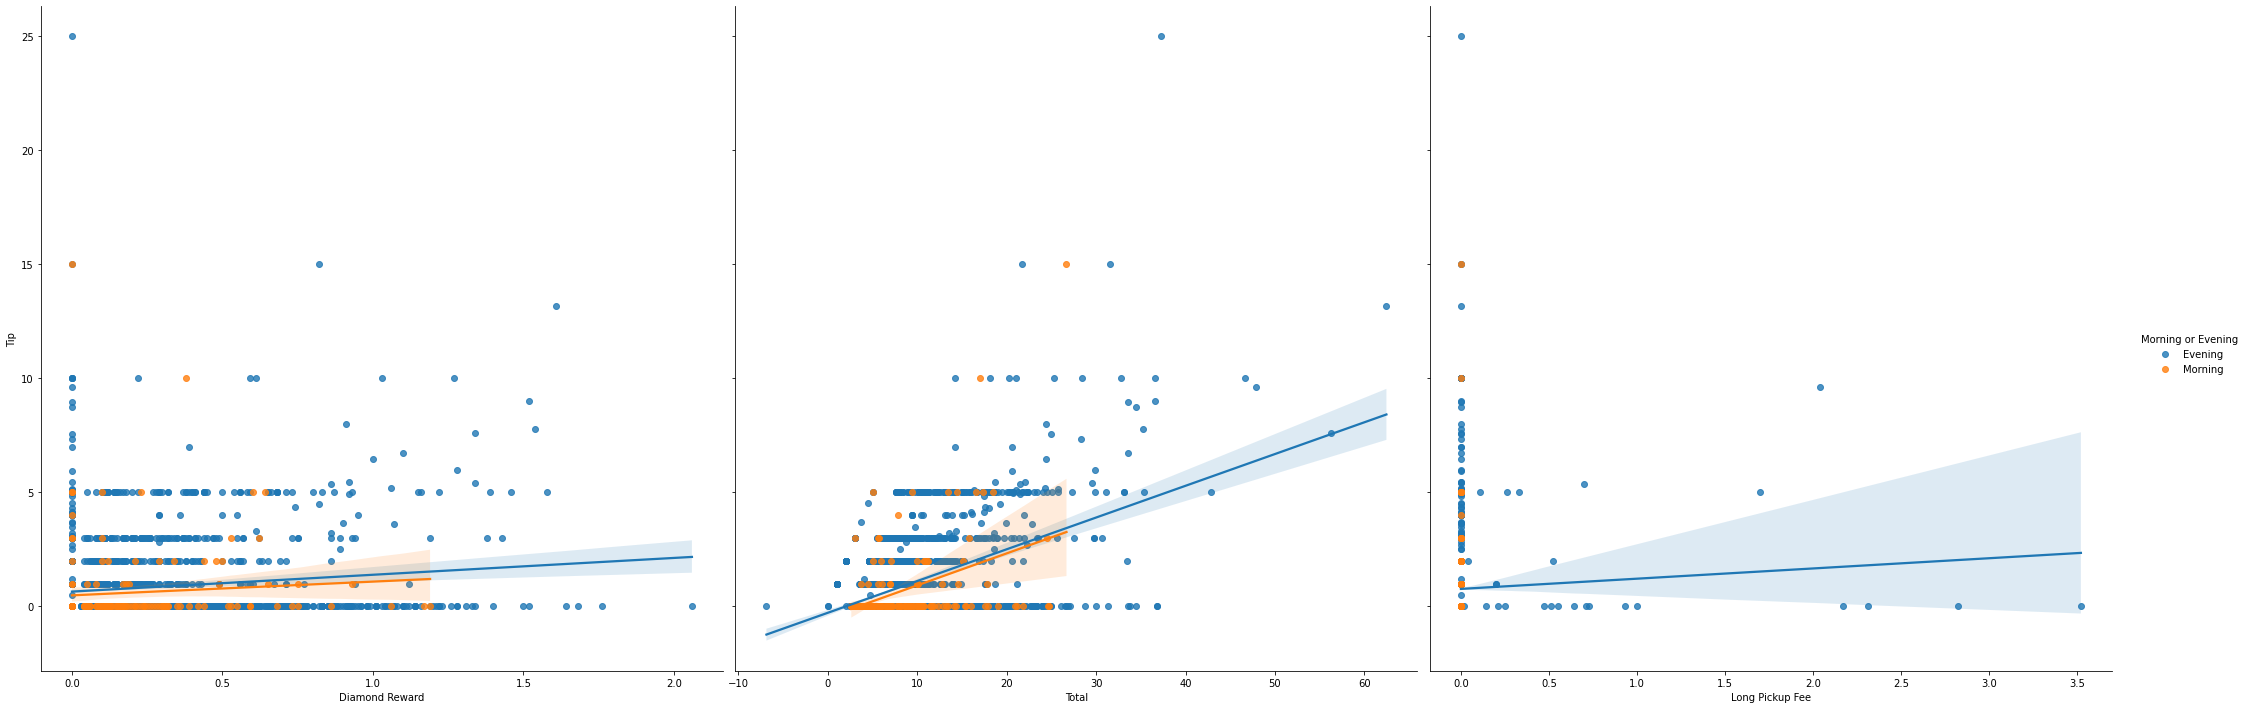

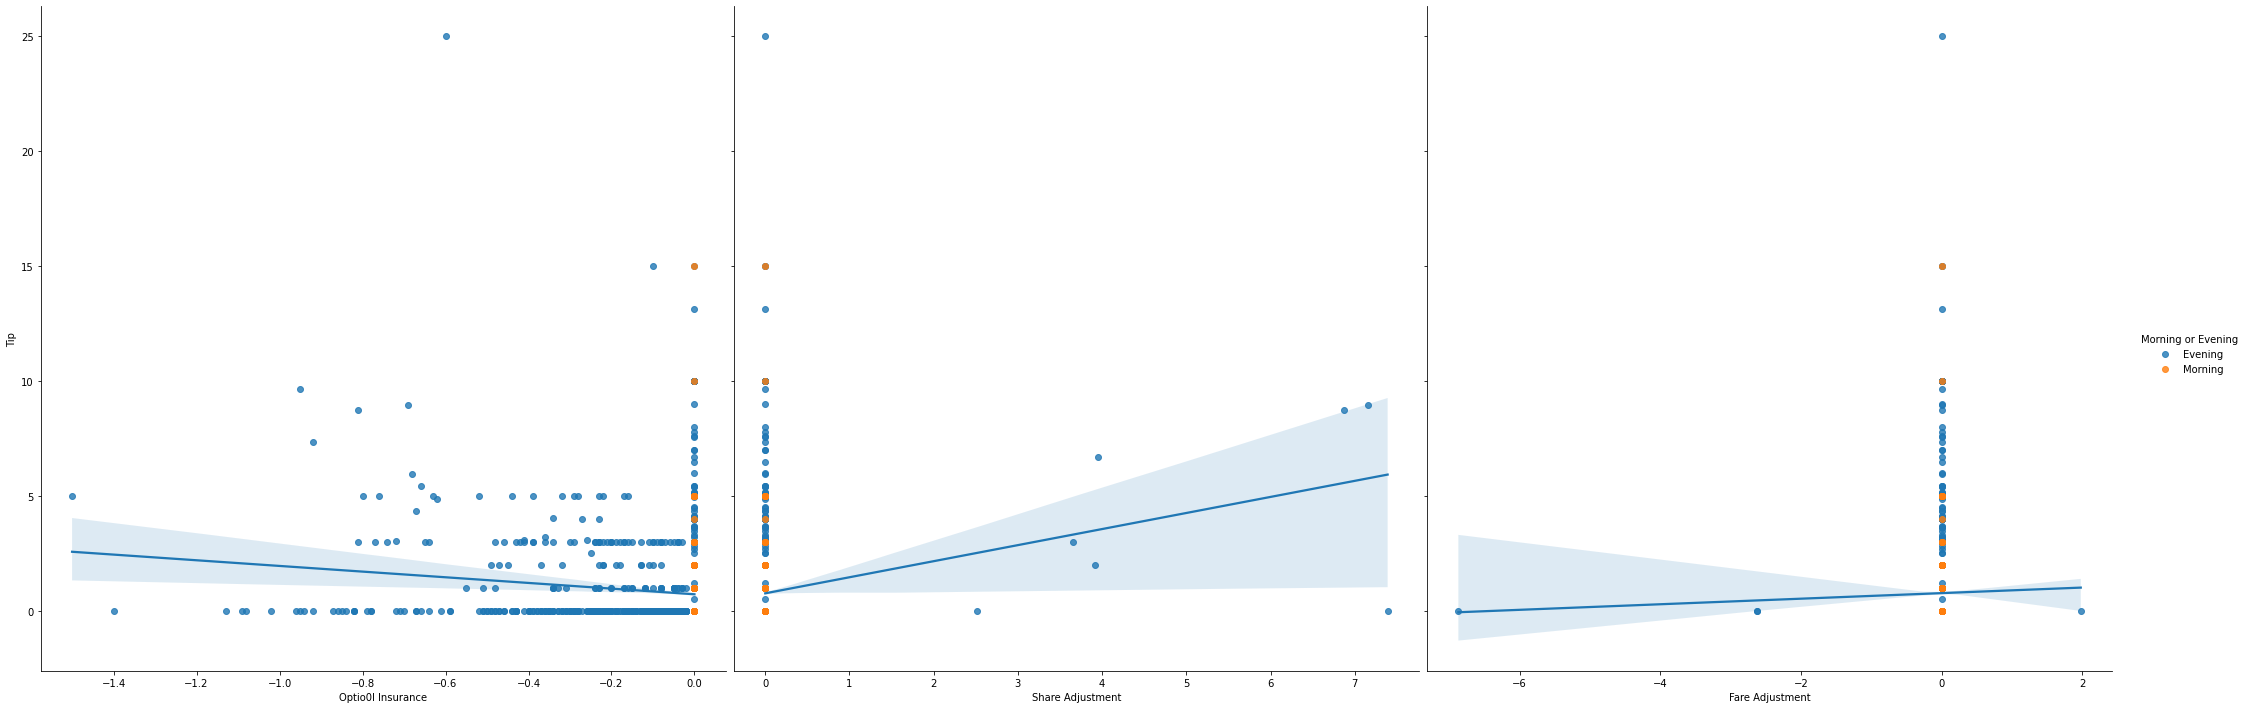

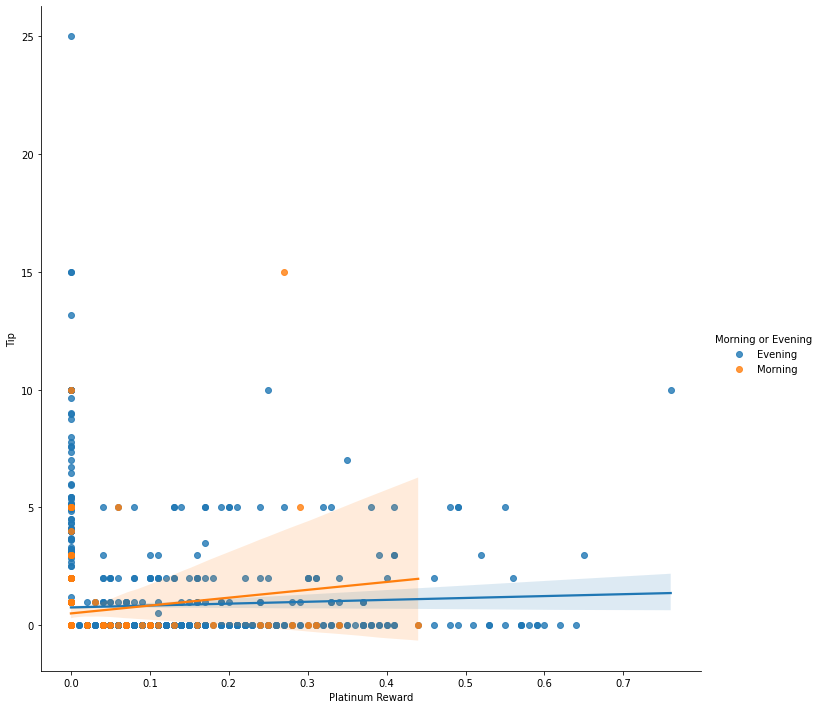

In [279]:
sns.pairplot(dataset, x_vars=['Base Fare','Distance','Time'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Morning or Evening')
sns.pairplot(dataset, x_vars=['Min Fare Supplement','Cancellation','Surge'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Morning or Evening')
sns.pairplot(dataset, x_vars=['Diamond Reward','Total','Long Pickup Fee'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Morning or Evening')
sns.pairplot(dataset, x_vars=['Optio0l Insurance','Share Adjustment','Fare Adjustment'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Morning or Evening')
sns.pairplot(dataset, x_vars=['Platinum Reward'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Morning or Evening')

#### Day of the week

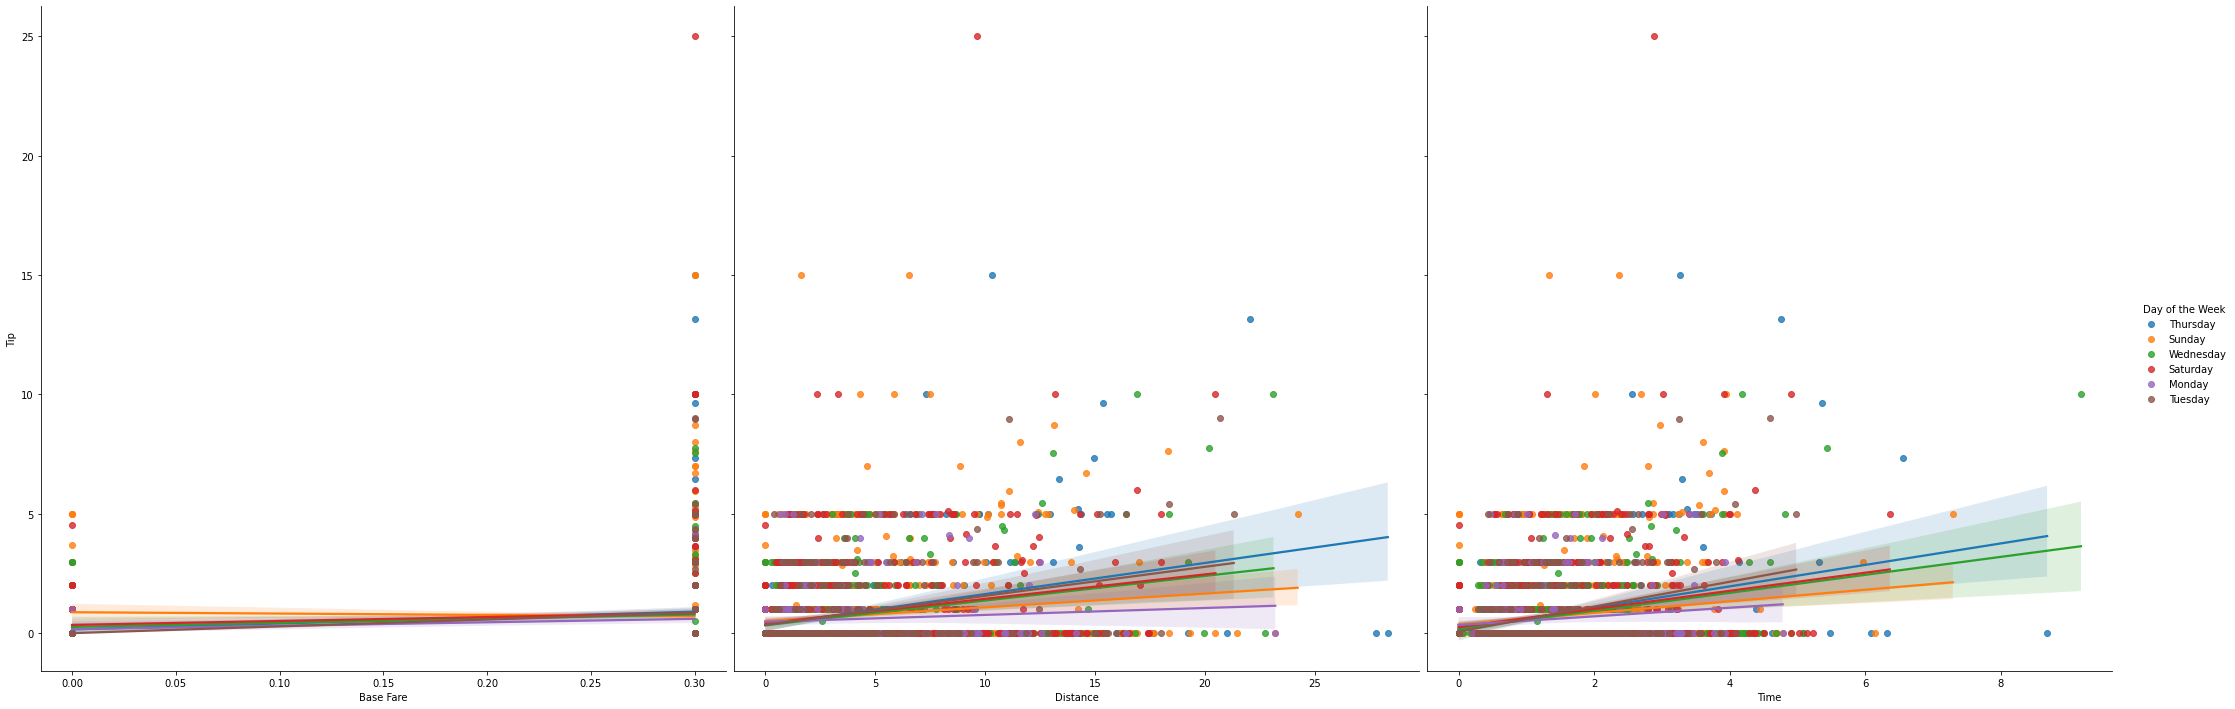

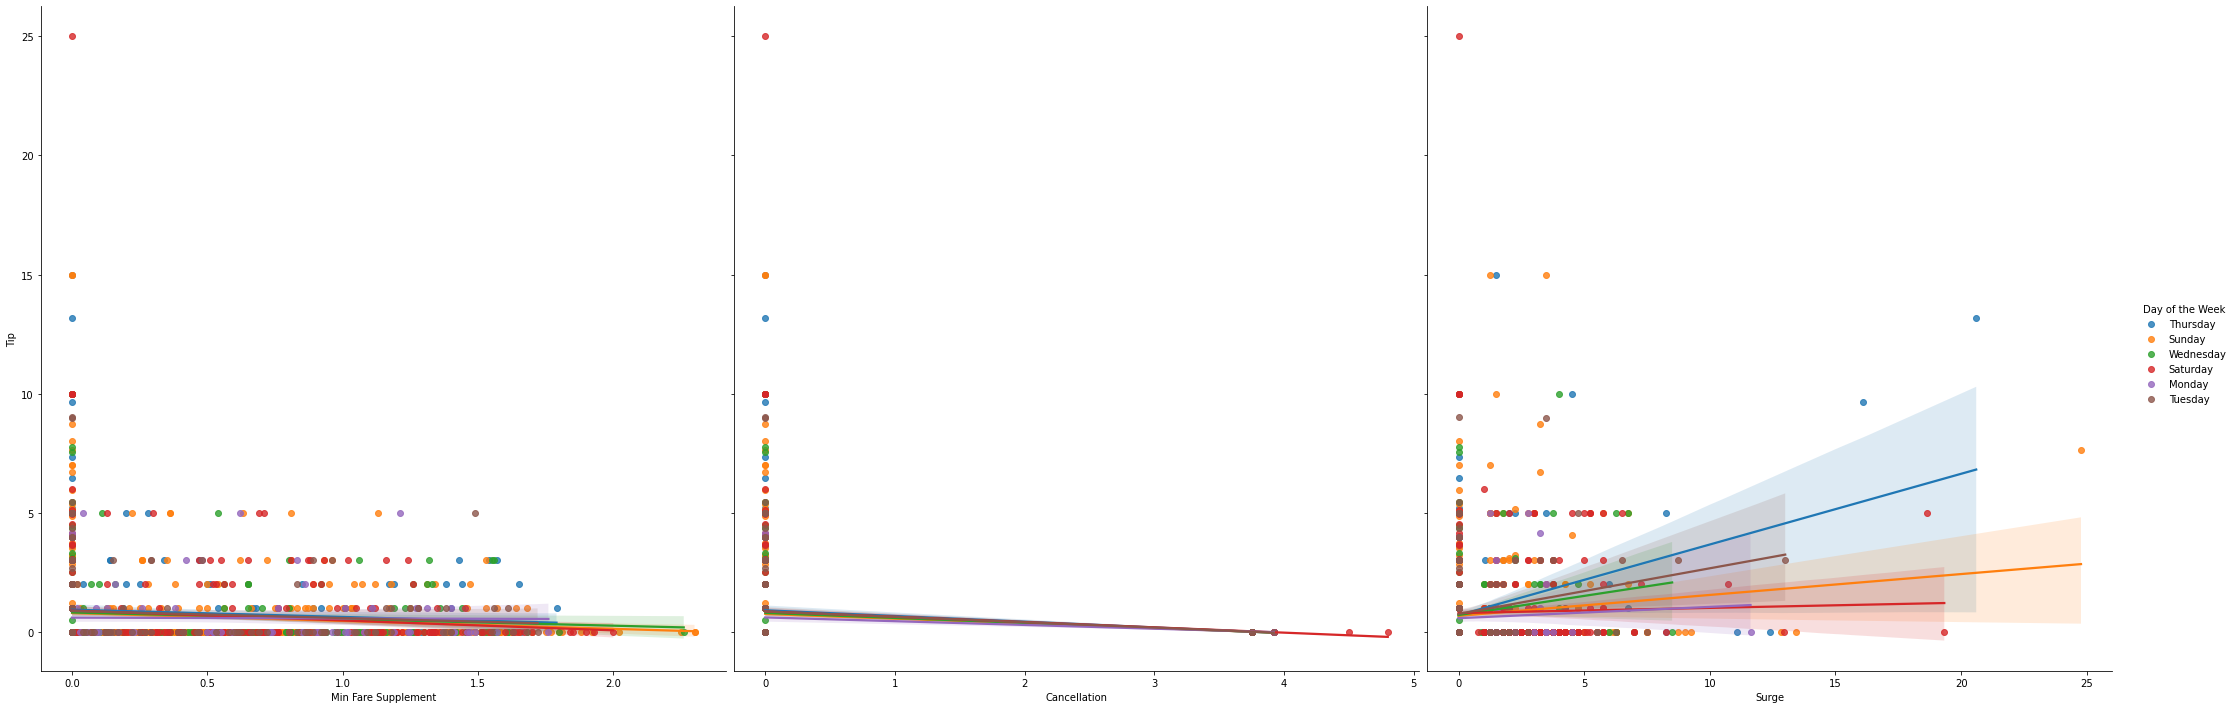

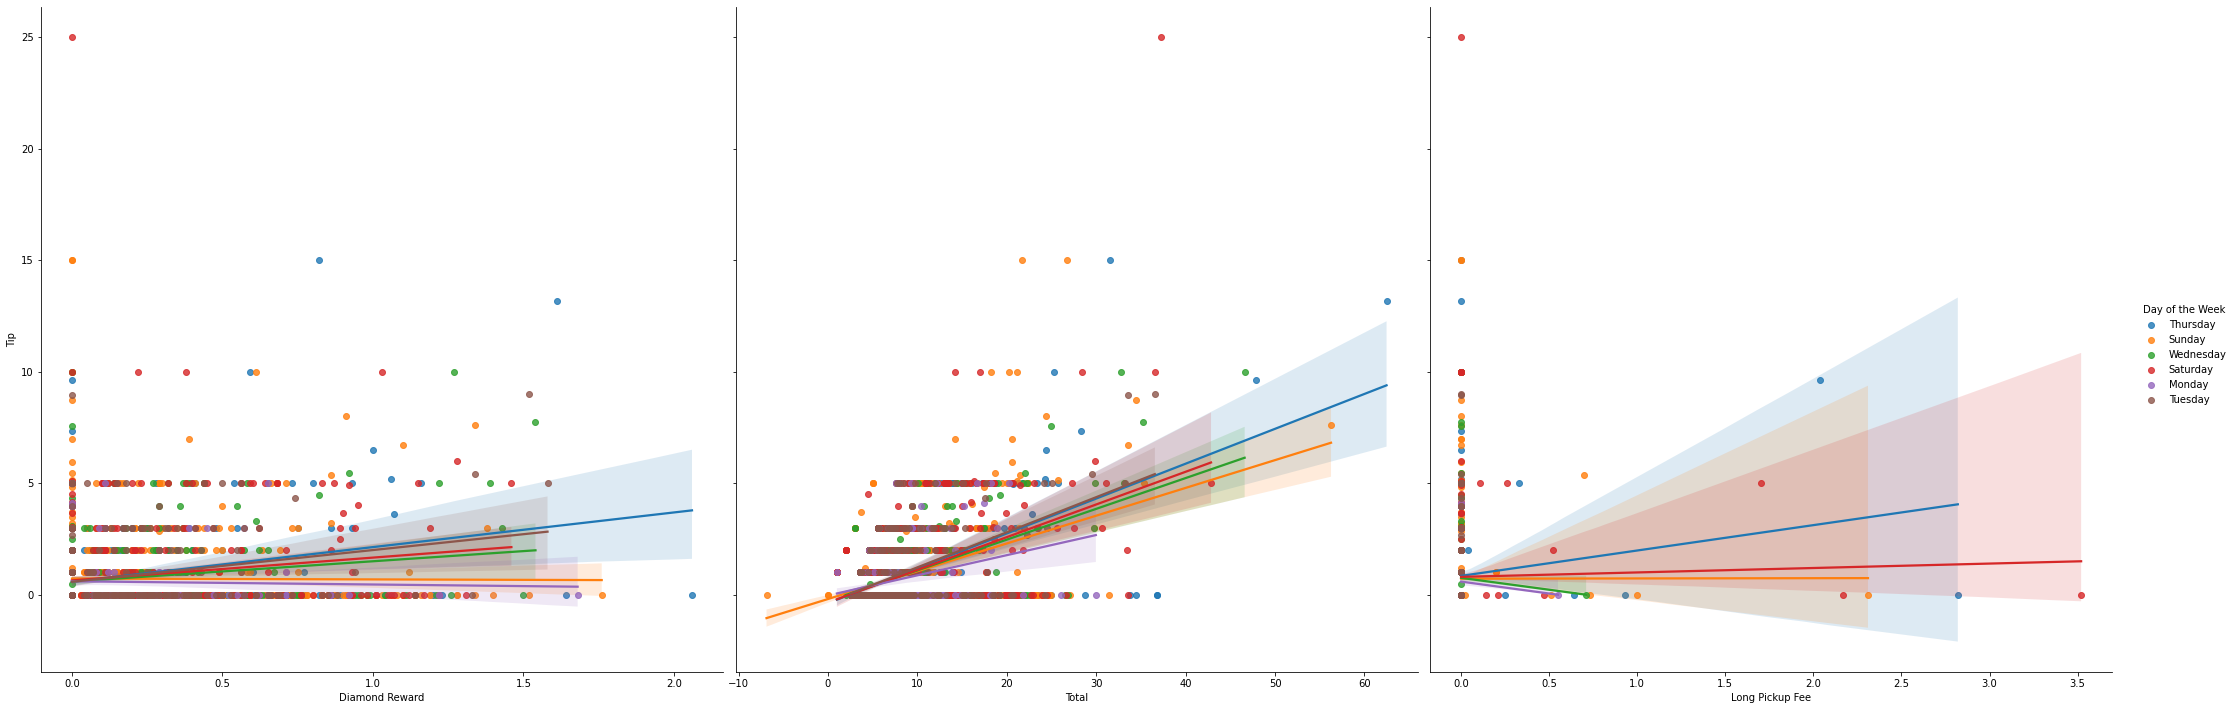

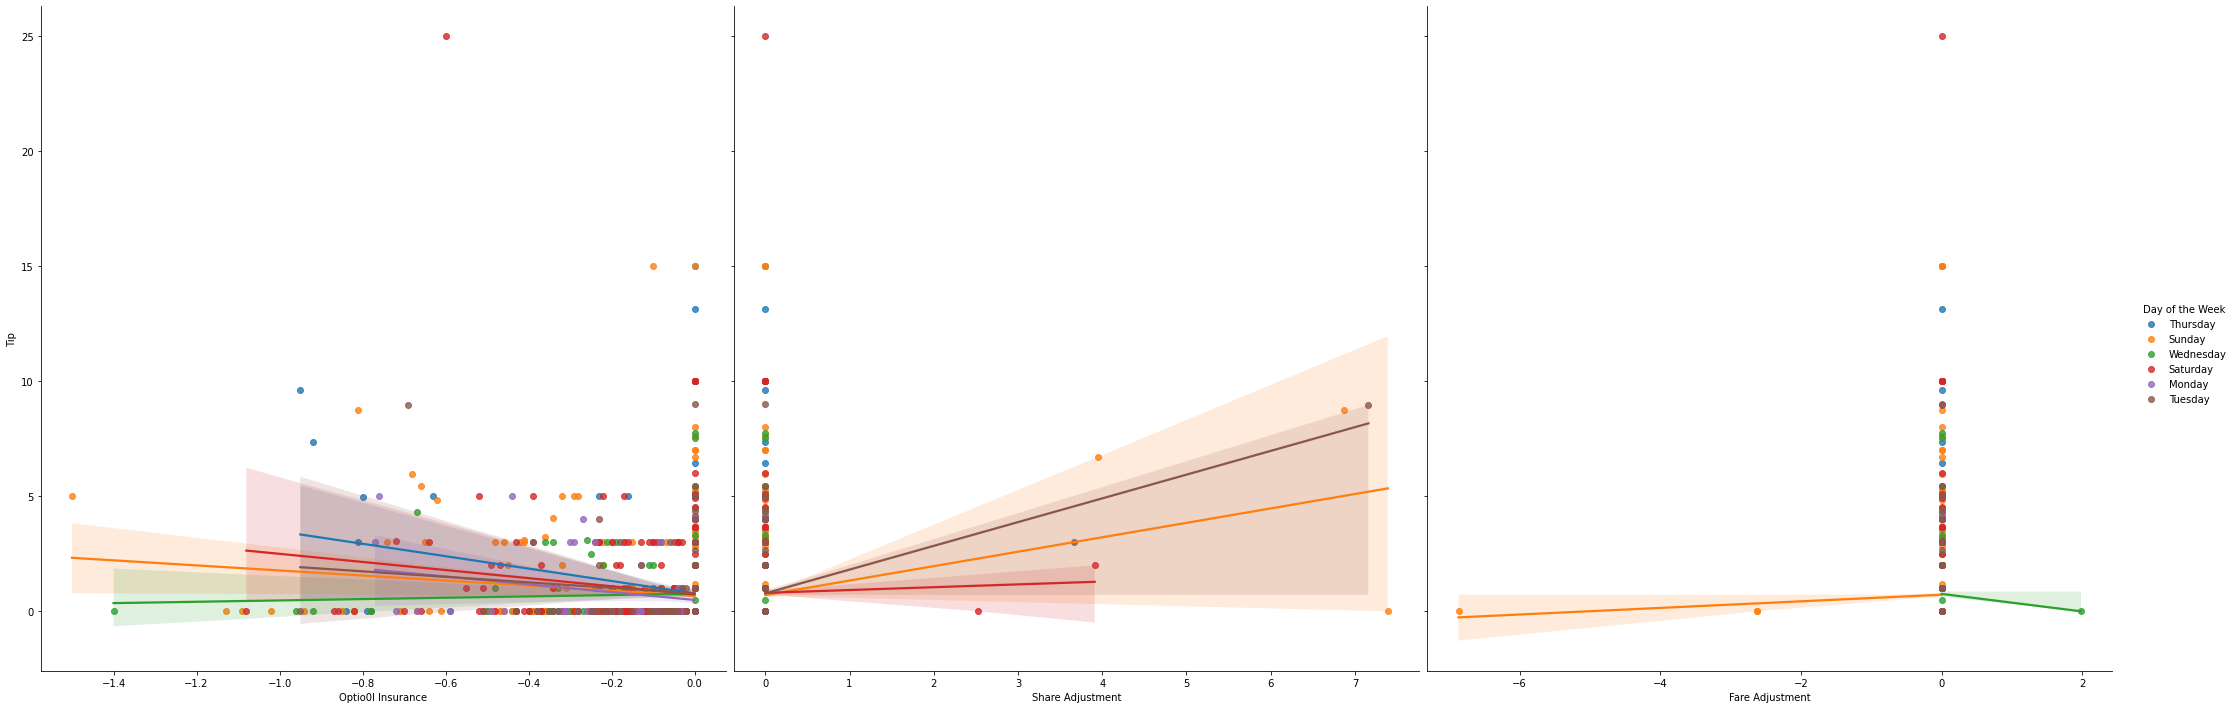

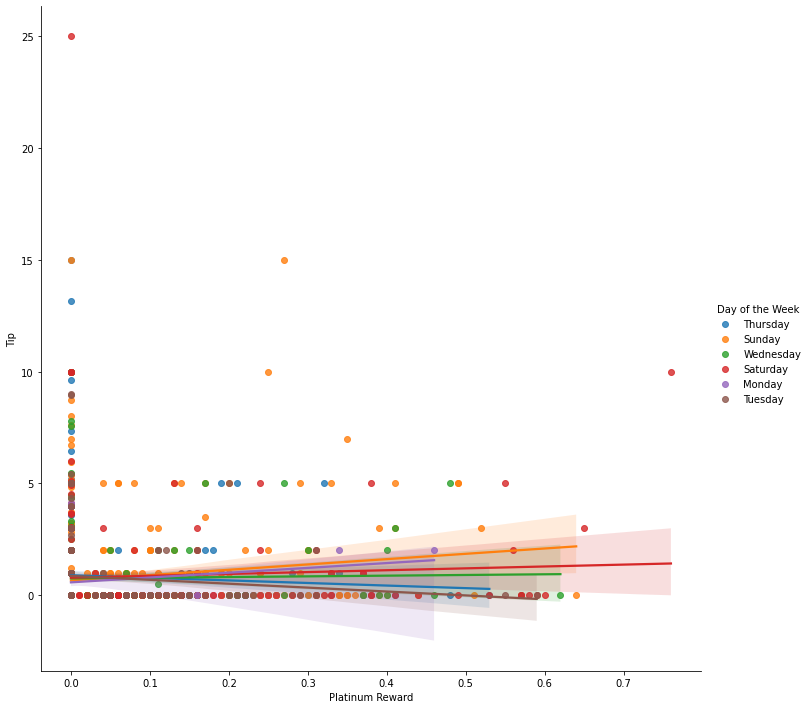

In [280]:
sns.pairplot(dataset, x_vars=['Base Fare','Distance','Time'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Day of the Week')
sns.pairplot(dataset, x_vars=['Min Fare Supplement','Cancellation','Surge'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Day of the Week')
sns.pairplot(dataset, x_vars=['Diamond Reward','Total','Long Pickup Fee'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Day of the Week')
sns.pairplot(dataset, x_vars=['Optio0l Insurance','Share Adjustment','Fare Adjustment'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Day of the Week')
sns.pairplot(dataset, x_vars=['Platinum Reward'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Day of the Week')

#### Weekend


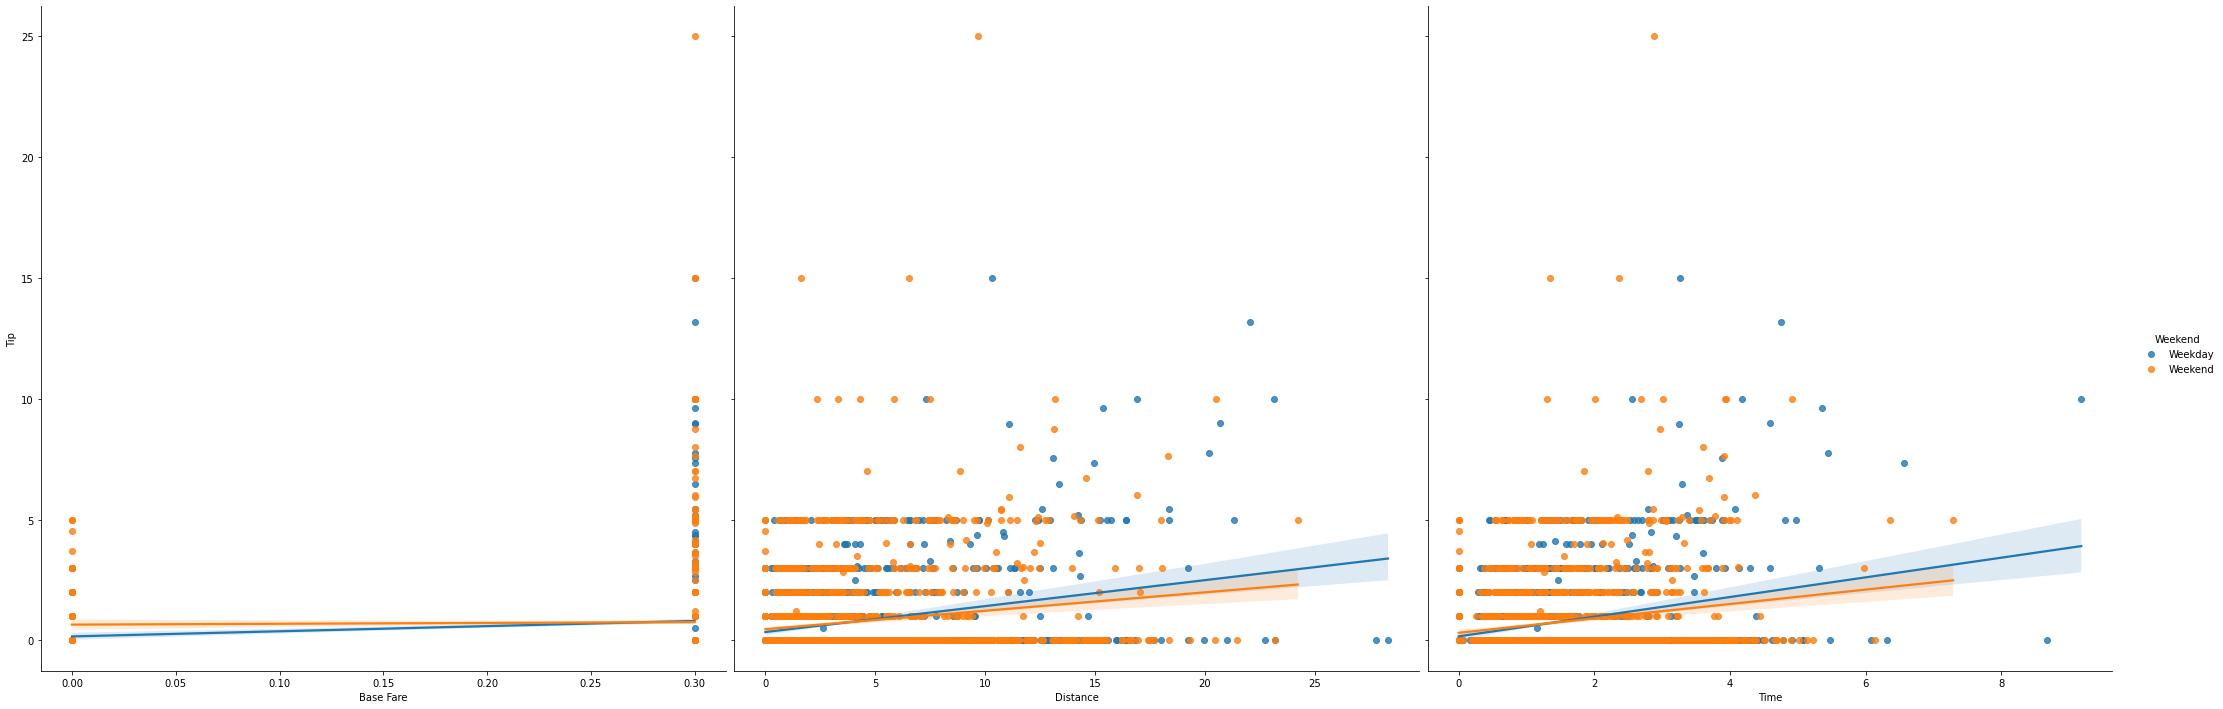

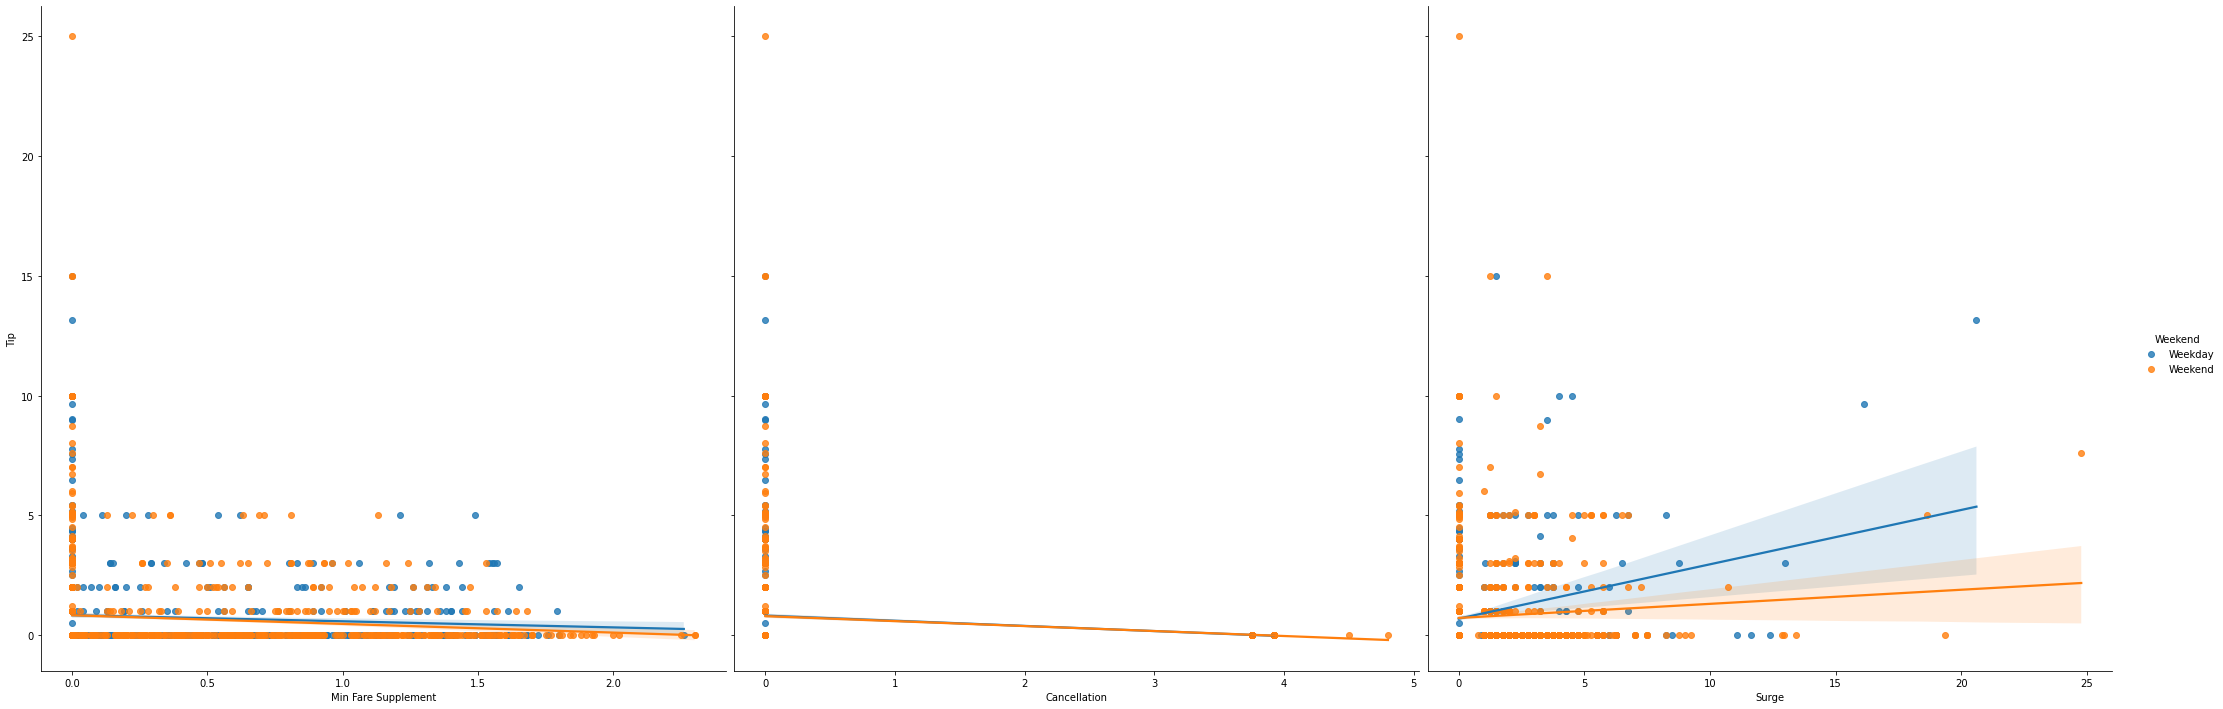

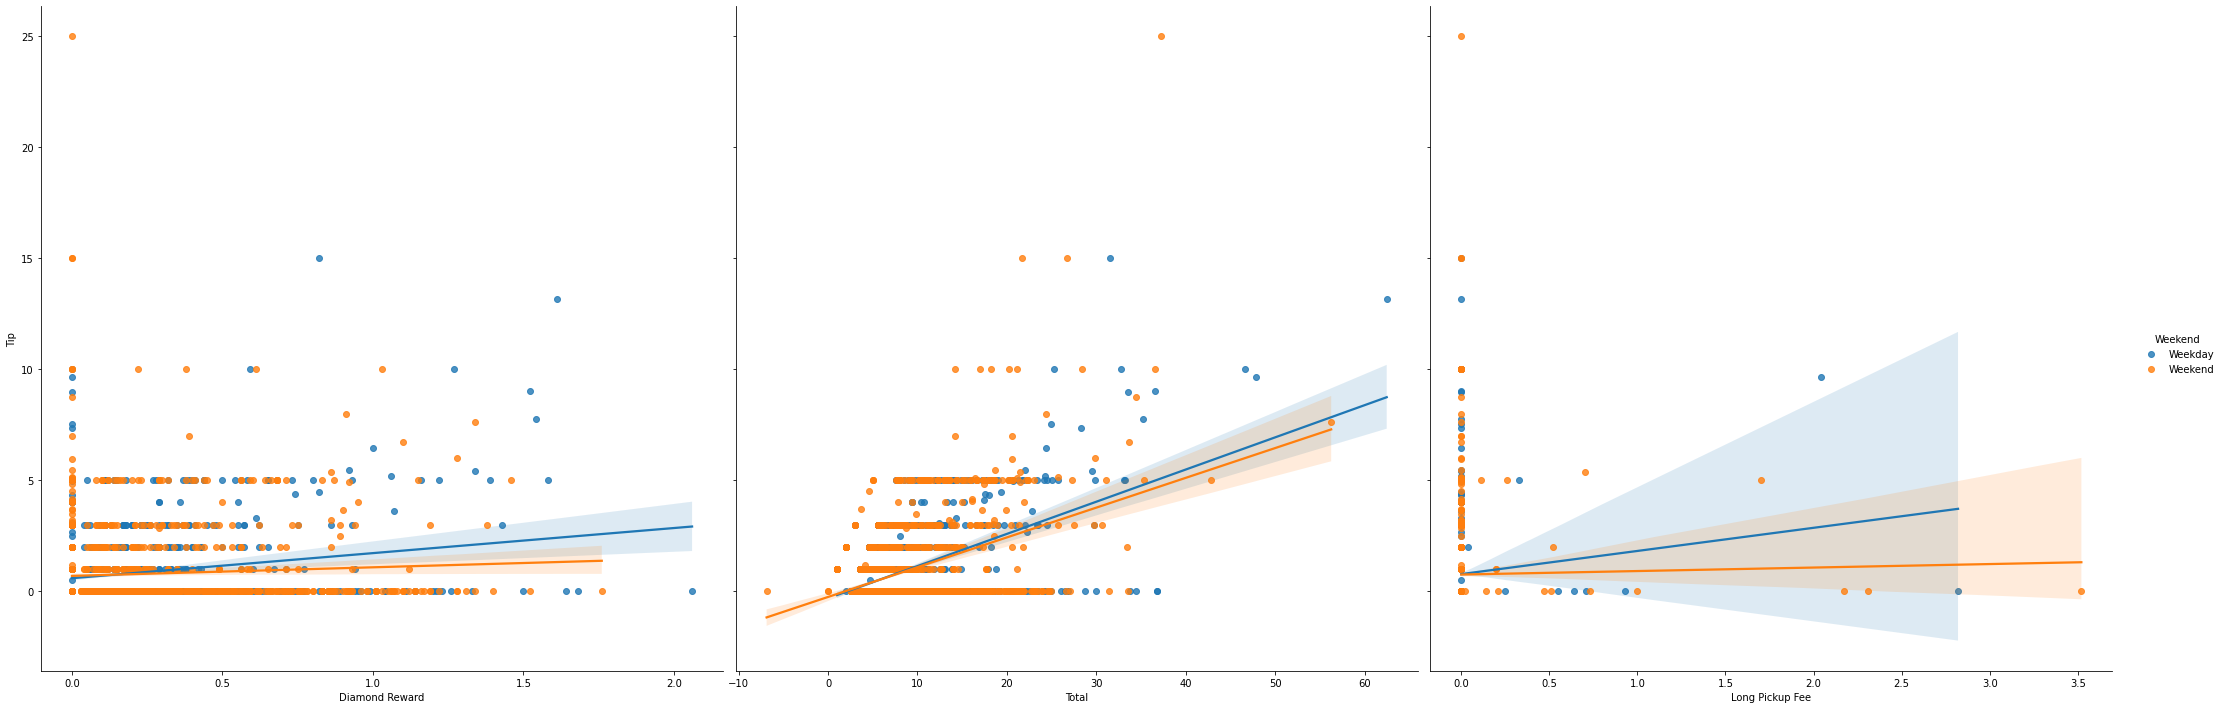

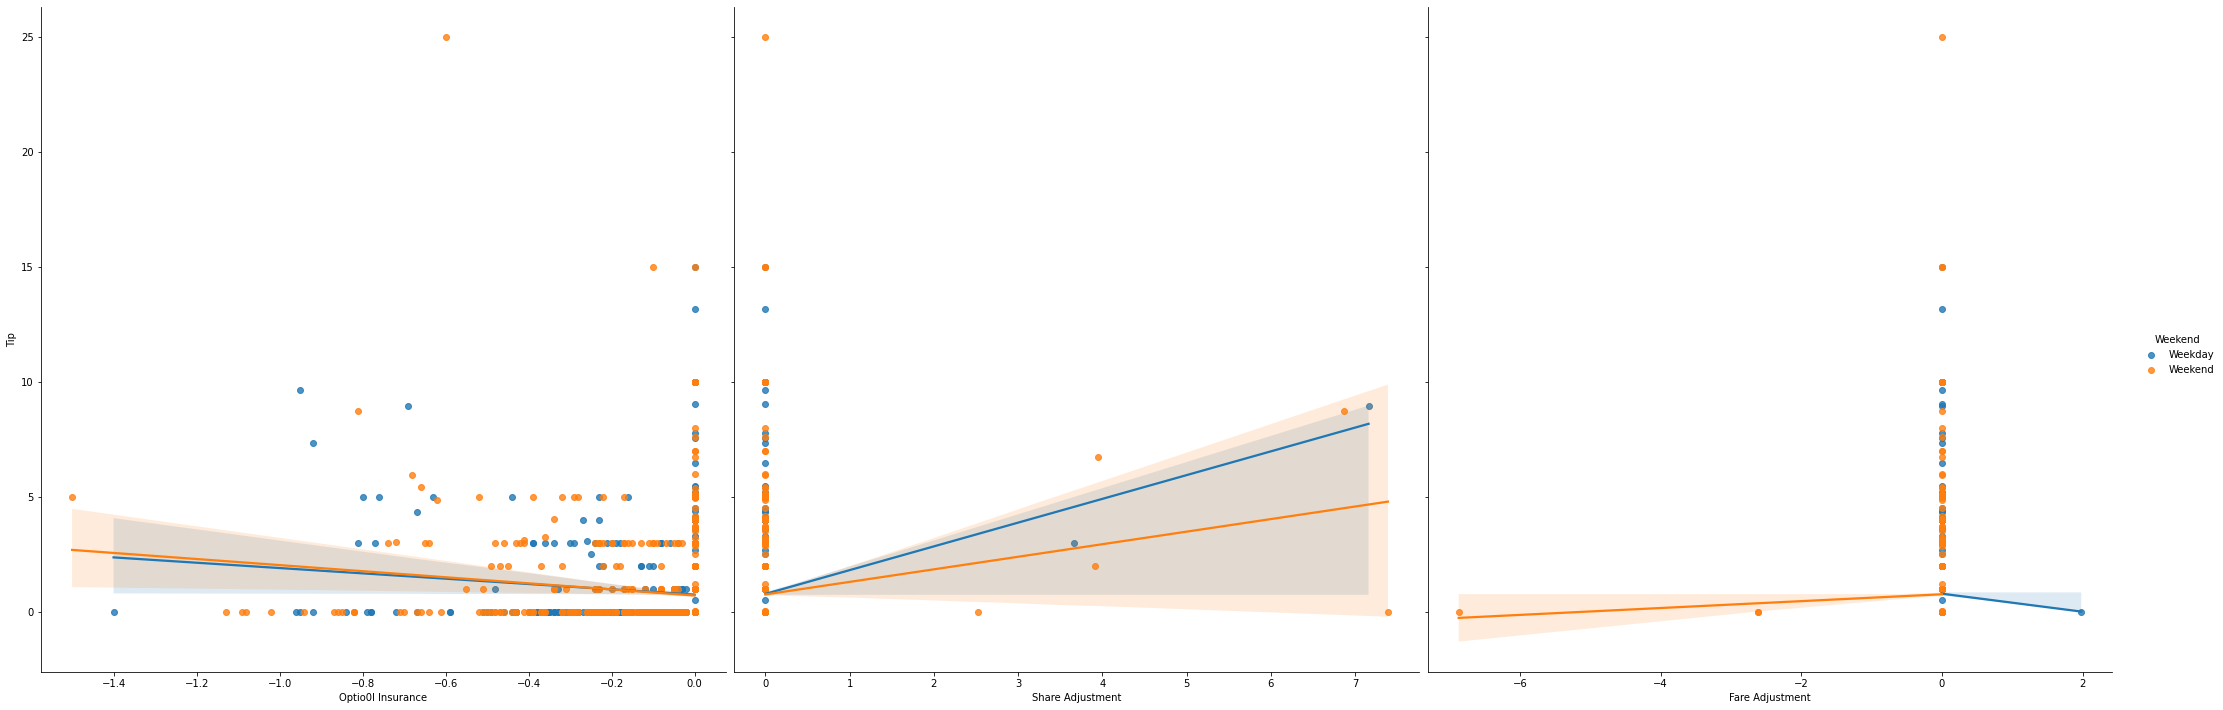

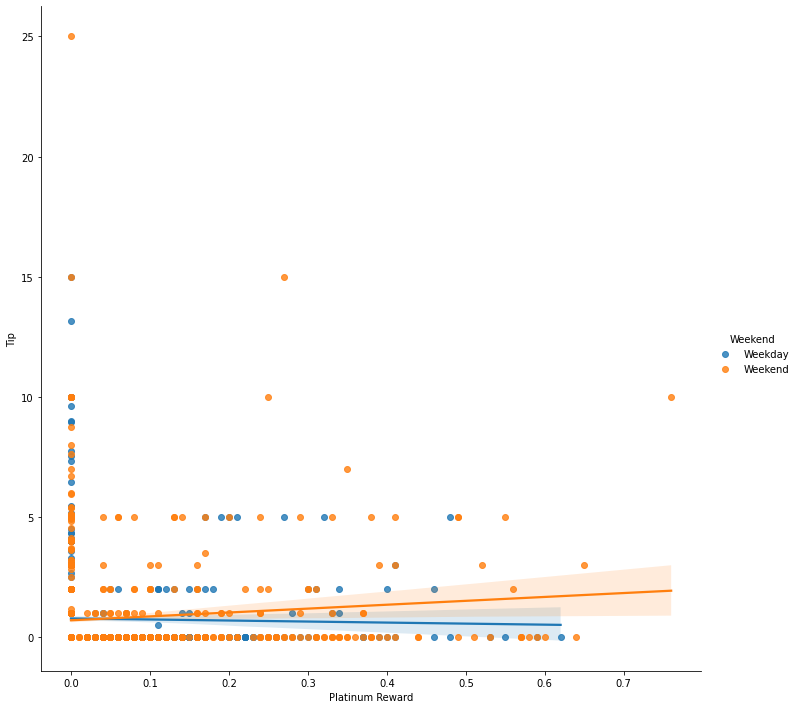

In [281]:
sns.pairplot(dataset, x_vars=['Base Fare','Distance','Time'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Weekend')
sns.pairplot(dataset, x_vars=['Min Fare Supplement','Cancellation','Surge'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Weekend')
sns.pairplot(dataset, x_vars=['Diamond Reward','Total','Long Pickup Fee'], y_vars='Tip', height=10, aspect=1, kind='reg',hue='Weekend')
sns.pairplot(dataset, x_vars=['Optio0l Insurance','Share Adjustment','Fare Adjustment'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Weekend')
sns.pairplot(dataset, x_vars=['Platinum Reward'], y_vars='Tip', height=10, aspect=1, kind='reg', hue='Weekend')

Weekend Conclusions: Effects from categorizing by morning vs evening, day of the week, or weekend vs weekend seem to be minimal. 

## Modeling

Using sklearn, I do linear regression and multiple regression modelling on the data.

### Linear Regression

#### Imports for Linear Regression

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

#### Creating the Linear Regression Models

In [283]:
# Create an array of all the datasets
x_var_names = ['Base Fare','Distance','Time','Min Fare Supplement','Cancellation','Surge','Diamond Reward','Total','Long Pickup Fee','Optio0l Insurance','Share Adjustment','Fare Adjustment','Platinum Reward']
x = [0,0,0,0,0,0,0,0,0,0,0,0,0]
x[0] = dataset[['Base Fare']]
x[1] = dataset[['Distance']]
x[2] = dataset[['Time']]
x[3] = dataset[['Min Fare Supplement']]
x[4] = dataset[['Cancellation']]
x[5] = dataset[['Surge']]
x[6] = dataset[['Diamond Reward']]
x[7] = dataset[['Total']]
x[8] = dataset[['Long Pickup Fee']]
x[9] = dataset[['Optio0l Insurance']]
x[10] = dataset[['Share Adjustment']]
x[11] = dataset[['Fare Adjustment']]
x[12] = dataset[['Platinum Reward']]



y = dataset['Tip']

In [284]:
# Init arrays
x_train = [0,0,0,0,0,0,0,0,0,0,0,0,0]
x_test = [0,0,0,0,0,0,0,0,0,0,0,0,0]
y_train = [0,0,0,0,0,0,0,0,0,0,0,0,0]
y_test = [0,0,0,0,0,0,0,0,0,0,0,0,0]
reg = [0,0,0,0,0,0,0,0,0,0,0,0,0]
intercept = [0,0,0,0,0,0,0,0,0,0,0,0,0]
coefficient = [0,0,0,0,0,0,0,0,0,0,0,0,0]
eqs = [0,0,0,0,0,0,0,0,0,0,0,0,0]
y_pred_reg = [0,0,0,0,0,0,0,0,0,0,0,0,0]
x_pred_reg = [0,0,0,0,0,0,0,0,0,0,0,0,0]

for index, var in enumerate(x):
  x_train[index], x_test[index], y_train[index], y_test[index] = train_test_split(x[index], y, test_size = 0.3, random_state = 99)

  reg[index] = LinearRegression()
  reg[index].fit(x_train[index], y_train[index])
  intercept[index] = reg[index].intercept_
  coefficient[index] = reg[index].coef_

  eqs[index] = 'Tip = %s + %s * (%s)'%(intercept[index],coefficient[index],x_var_names[index])

for eq in eqs:
  print(eq)  

Tip = 0.5252755905511916 + [0.85845382] * (Base Fare)
Tip = 0.45793579322093425 + [0.07885178] * (Distance)
Tip = 0.29670047398593746 + [0.3152301] * (Time)
Tip = 0.8309974902686637 + [-0.31960574] * (Min Fare Supplement)
Tip = 0.8024749462227033 + [-0.21271389] * (Cancellation)
Tip = 0.7076256830688059 + [0.11042091] * (Surge)
Tip = 0.6686178531808187 + [0.58781366] * (Diamond Reward)
Tip = -0.20312226055725868 + [0.12746508] * (Total)
Tip = 0.7648424850102665 + [0.38062147] * (Long Pickup Fee)
Tip = 0.7301408111223608 + [-0.94619132] * (Optio0l Insurance)
Tip = 0.7563093034404373 + [0.70096427] * (Share Adjustment)
Tip = 0.7680972124241997 + [0.09948674] * (Fare Adjustment)
Tip = 0.7356400861144413 + [1.3822777] * (Platinum Reward)


#### Prediction Based on the Model

In [285]:
# Testing Predictions
for index, var in enumerate(x): 
  y_pred_reg[index] = reg[index].predict(x_test[index])

In [286]:
# Showing actual values vs predicted values of the data
predictionTable = pd.DataFrame({
    'Actual Value': y_test[0], 
    x_var_names[0]: y_pred_reg[0], 
    x_var_names[1]: y_pred_reg[1], 
    x_var_names[2]: y_pred_reg[2], 
    x_var_names[3]: y_pred_reg[3], 
    x_var_names[4]: y_pred_reg[4], 
    x_var_names[5]: y_pred_reg[5], 
    x_var_names[6]: y_pred_reg[6], 
    x_var_names[7]: y_pred_reg[7], 
    x_var_names[8]: y_pred_reg[8], 
    x_var_names[9]: y_pred_reg[9], 
    x_var_names[10]: y_pred_reg[10], 
    x_var_names[11]: y_pred_reg[11], 
    x_var_names[12]: y_pred_reg[12], 
    })

predictionTable

,Actual Value,Base Fare,Distance,Time,Min Fare Supplement,Cancellation,Surge,Diamond Reward,Total,Long Pickup Fee,Optio0l Insurance,Share Adjustment,Fare Adjustment,Platinum Reward
272,0.0,0.782812,1.081653,0.987054,0.830997,0.802475,0.707626,1.027184,1.200268,0.764842,0.730141,0.756309,0.768097,0.735640
2091,2.0,0.782812,0.641660,0.697043,0.830997,0.802475,0.707626,0.668618,0.561668,0.764842,0.730141,0.756309,0.768097,0.873868
2735,5.0,0.782812,0.591195,0.624540,0.830997,0.802475,0.707626,0.668618,0.825521,0.764842,0.730141,0.756309,0.768097,0.735640
2296,0.0,0.782812,0.681086,0.662367,0.830997,0.802475,0.707626,0.809693,0.374295,0.764842,0.730141,0.756309,0.768097,0.735640
187,0.0,0.782812,0.951548,1.021730,0.830997,0.802475,0.956073,0.968403,1.314987,0.764842,0.730141,0.756309,0.768097,0.735640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,0.0,0.782812,1.644655,0.936618,0.830997,0.802475,1.011283,0.668618,2.362750,0.764842,0.730141,0.756309,0.768097,0.735640
2852,0.0,0.782812,0.633775,0.608778,0.830997,0.802475,0.707626,0.668618,0.258301,0.764842,0.730141,0.756309,0.768097,0.873868
307,1.0,0.782812,0.502093,0.485839,0.460255,0.802475,0.707626,0.709765,0.267224,0.764842,0.730141,0.756309,0.768097,0.735640
2528,0.0,0.782812,0.527325,0.482686,0.556137,0.802475,0.707626,0.668618,0.125738,0.764842,0.777450,0.756309,0.768097,0.735640


#### Accuracy of the Models

To test the accuracy, I will show the R squared values and error

In [287]:
# R squared value
for index, var in enumerate(x): 
  r2 = reg[index].score(x[index],y)*100
  print('R squared value for %s model: %s'%(x_var_names[index], r2))

R squared value for Base Fare model: 0.16478825337008507
R squared value for Distance model: 4.50184533333442
R squared value for Time model: 4.735678507496988
R squared value for Min Fare Supplement model: 0.6675732024644776
R squared value for Cancellation model: 0.9581351408252337
R squared value for Surge model: 1.3449653930827754
R squared value for Diamond Reward model: 1.3362251889793009
R squared value for Total model: 23.886849262296607
R squared value for Long Pickup Fee model: 0.10071454670917968
R squared value for Optio0l Insurance model: 0.880623787211432
R squared value for Share Adjustment model: 1.1837072725825903
R squared value for Fare Adjustment model: 0.010013602078695616
R squared value for Platinum Reward model: 0.14343386843430617


In [288]:
for index, var in enumerate(x): 
  mean_ab_er = metrics.mean_absolute_error(y_test[index], y_pred_reg[index])
  mean_sq_er = metrics.mean_squared_error(y_test[index], y_pred_reg[index])
  root_mean_er = mean_sq_er ** (1/2)
  print('Model: ', x_var_names[index])
  print('Mean absolute error: ',mean_ab_er)
  print('Mean square error: ', mean_sq_er)
  print('Root mean square: ', root_mean_er)

Model:  Base Fare
Mean absolute error:  1.106988156752214
Mean square error:  3.1583863850393876
Root mean square:  1.777184960840989
Model:  Distance
Mean absolute error:  1.077552732284949
Mean square error:  2.9879259931378828
Root mean square:  1.7285618279766226
Model:  Time
Mean absolute error:  1.0755747536369566
Mean square error:  2.995297441381452
Root mean square:  1.7306927634278282
Model:  Min Fare Supplement
Mean absolute error:  1.10587820490252
Mean square error:  3.1461397148360186
Root mean square:  1.7737360893988763
Model:  Cancellation
Mean absolute error:  1.091418074156296
Mean square error:  3.140143157506708
Root mean square:  1.772044908433956
Model:  Surge
Mean absolute error:  1.1088581702884774
Mean square error:  3.114468053023951
Root mean square:  1.7647855544014268
Model:  Diamond Reward
Mean absolute error:  1.0947671293494678
Mean square error:  3.10390407939484
Root mean square:  1.7617900213688464
Model:  Total
Mean absolute error:  0.91871292959493

#### Linear Regression Conclusion

Overall, these data do not seem to fit the linear regression model for any one variable, apart from Total, which achieved a fairly high R squared of 23.886849262296607

### Multiple Linear Regression


#### Creating the Multiple Linear Regression Model

In [289]:
x = dataset[['Base Fare','Distance','Time','Min Fare Supplement','Cancellation','Surge','Diamond Reward','Total','Long Pickup Fee','Optio0l Insurance','Share Adjustment','Fare Adjustment','Platinum Reward']]
y = dataset['Tip']

In [290]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 99)

In [291]:
mreg = LinearRegression()
mreg.fit(x_train, y_train)

LinearRegression()

In [292]:
mreg.coef_


array([-1.2291657 , -0.99157228, -0.98795922, -0.96853183, -0.99432981,
       -0.99205252, -0.98286328,  0.98762502, -0.93599693, -1.09106209,
       -1.01413615, -0.98563911, -1.02059491])

In [293]:
mreg.coef_

intercept = mreg.intercept_

eq = 'Tip = %s + %s * (Base Fare) + %s * (Distance) + %s * (Time) + %s * (Min Fare Supplement) + %s * (Cancellation) + %s * (Surge) + %s * (Diamond Reward) + %s * (Total) + %s * (Long Pickup Fee) + %s * (Optio0l Insurance) + %s * (Share Adjustment) + %s * (Fare Adjustment) + %s * (Platinum Reward)'%(
    intercept,
    mreg.coef_[0],
    mreg.coef_[1],
    mreg.coef_[2],
    mreg.coef_[3],
    mreg.coef_[4],
    mreg.coef_[5],
    mreg.coef_[6],
    mreg.coef_[7],
    mreg.coef_[8],
    mreg.coef_[9],
    mreg.coef_[10],
    mreg.coef_[11],
    mreg.coef_[12],
    )
eq

'Tip = 0.02529419400154087 + -1.2291656996718963 * (Base Fare) + -0.9915722824502877 * (Distance) + -0.9879592231408336 * (Time) + -0.9685318280679079 * (Min Fare Supplement) + -0.994329807952034 * (Cancellation) + -0.992052523022768 * (Surge) + -0.9828632753258274 * (Diamond Reward) + 0.9876250173898865 * (Total) + -0.9359969345296492 * (Long Pickup Fee) + -1.091062087452608 * (Optio0l Insurance) + -1.014136153567697 * (Share Adjustment) + -0.985639106884488 * (Fare Adjustment) + -1.020594909540246 * (Platinum Reward)'

#### Prediction Based on the Model

In [294]:
y_pred_mreg = mreg.predict(x_test)
x_pred_mreg = mreg.predict(x_train)

In [295]:
prediction = pd.DataFrame({'Actual Value': y_test, 'Prediction': y_pred_mreg})
prediction

,Actual Value,Prediction
272,0.0,-0.076218
2091,2.0,1.915163
2735,5.0,4.923444
2296,0.0,-0.057584
187,0.0,0.206231
...,...,...
2957,0.0,-0.119428
2852,0.0,-0.059598
307,1.0,0.960527
2528,0.0,-0.029247


#### Accuracy of the Model

To test the accuracy, I will show the R squared values and error.

In [296]:
# R squared value
r2 = mreg.score(x,y)*100

print('R squared value: ', r2)

R squared value:  98.75582386630697


In [297]:
mean_ab_er = metrics.mean_absolute_error(y_test, y_pred_mreg)
mean_sq_er = metrics.mean_squared_error(y_test, y_pred_mreg)
root_mean_er = mean_sq_er ** (1/2)

print('Mean absolute error: ', mean_ab_er)
print('Mean square error: ', mean_sq_er)
print('Root mean square error: ', root_mean_er)

Mean absolute error:  0.09340111101377355
Mean square error:  0.02820703880452539
Root mean square error:  0.16794951266534056


#### Multiple Linear Regression Conclusion

These data do seem to really fit the Multiple Linear Regression model, and it is coming up with very accurate predictions as seen by the R squared value of 98.75582386630697 and low errors.

### Logistic Regression


#### Creating the Logistic Regression Model
Are 'Base Fare','Distance','Time','Min Fare Supplement','Cancellation','Surge','Diamond Reward','Total','Long Pickup Fee','Optio0l Insurance','Share Adjustment','Fare Adjustment','Platinum Reward', and 'Tip' good predictors of Evening vs Morning, Day of the week, and whether or not its a weekend?

#### Morning or Evening Logistic Regression

In [298]:
x = dataset[['Base Fare','Distance','Time','Min Fare Supplement','Cancellation','Surge','Diamond Reward','Total','Long Pickup Fee','Optio0l Insurance','Share Adjustment','Fare Adjustment','Platinum Reward','Tip']]
y = dataset['Morning or Evening']

In [299]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 99)

In [300]:
lreg = LogisticRegression(solver='liblinear', random_state=99)
lreg.fit(x_train, y_train)

LogisticRegression(random_state=99, solver='liblinear')

In [301]:
lreg.coef_


array([[-0.68737466, -0.38901732, -0.67150933, -0.3127562 , -0.2065323 ,
        -0.10585864,  0.23935202,  0.37239922, -1.18535351,  1.78892774,
        -0.56043042, -0.07721748,  0.84248209, -0.39773407]])

#### Prediction Based on the Model

In [302]:
y_pred_lreg = lreg.predict(x_test)

In [303]:
prediction = pd.DataFrame({'Actual Value': y_test, 'Prediction': y_pred_lreg})
prediction

,Actual Value,Prediction
272,Evening,Evening
2091,Evening,Evening
2735,Evening,Evening
2296,Evening,Evening
187,Evening,Evening
...,...,...
2957,Evening,Evening
2852,Evening,Evening
307,Evening,Evening
2528,Evening,Evening


#### Accuracy of the Model

To test the accuracy, I will show the R squared values and error.

In [304]:
# R squared value
r2 = lreg.score(x,y)*100

print('R squared value: ', r2)

R squared value:  93.9110824742268


#### Morning or Evening Conclusion:
Overall the Logistic Regression Model is very good at predicting whether or not it is the evening or morning, getting an R squared value of 93.9110824742268.


#### Day of the Week Logistic Regression

In [305]:
x = dataset[['Base Fare','Distance','Time','Min Fare Supplement','Cancellation','Surge','Diamond Reward','Total','Long Pickup Fee','Optio0l Insurance','Share Adjustment','Fare Adjustment','Platinum Reward','Tip']]
y = dataset['Day of the Week']

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 99)

In [307]:
lreg = LogisticRegression(solver='liblinear', random_state=99)
lreg.fit(x_train, y_train)

LogisticRegression(random_state=99, solver='liblinear')

In [308]:
lreg.coef_


array([[ 0.64963353,  0.62231331, -0.50398533,  0.10987221,  0.09699866,
         0.36724539, -0.20668122, -0.42281403,  0.05527316, -0.28906995,
        -0.12980514,  0.48745946, -1.12373847,  0.37391944],
       [-0.4053081 ,  0.17667105,  0.07919387,  0.01686666,  0.24036667,
         0.29244819,  0.20076135, -0.15649621,  0.14681267,  0.29039727,
         0.06039048,  0.32342075,  0.36671177,  0.1404236 ],
       [-1.76543741, -0.20745053,  0.05648561, -0.06162545, -0.32786558,
        -0.13354374,  0.16491256,  0.13535694, -0.15787854, -0.6441725 ,
        -0.00438186, -0.88173778,  0.80471391, -0.14704612],
       [-0.06088747,  0.08490775,  0.3184495 ,  0.27899221,  0.1572865 ,
         0.11794659, -0.1158632 , -0.11310708,  0.29459895,  0.68675116,
        -0.41537541,  0.27252953, -0.36269796,  0.11396306],
       [ 0.50483165, -0.16531718, -0.44854346, -0.65188063, -0.21823936,
        -0.3548263 ,  0.09372239,  0.18038081, -0.56916059, -0.20387818,
         0.17491159,  0.00

#### Prediction Based on the Model

In [309]:
y_pred_lreg = lreg.predict(x_test)

In [310]:
prediction = pd.DataFrame({'Actual Value': y_test, 'Prediction': y_pred_lreg})
prediction

,Actual Value,Prediction
272,Thursday,Sunday
2091,Thursday,Sunday
2735,Saturday,Sunday
2296,Sunday,Sunday
187,Sunday,Sunday
...,...,...
2957,Wednesday,Saturday
2852,Saturday,Sunday
307,Tuesday,Sunday
2528,Tuesday,Sunday


#### Accuracy of the Model

To test the accuracy, I will show the R squared values and error.

In [311]:
# R squared value
r2 = lreg.score(x,y)*100

print('R squared value: ', r2)

R squared value:  34.246134020618555


#### Day of the Week Conclusion:
Overall the Logistic Regression Model is not so good at predicting whether or not it is the evening or morning, getting an R squared value of 34.246134020618555.

#### Morning or Evening Logistic Regression

In [312]:
x = dataset[['Base Fare','Distance','Time','Min Fare Supplement','Cancellation','Surge','Diamond Reward','Total','Long Pickup Fee','Optio0l Insurance','Share Adjustment','Fare Adjustment','Platinum Reward','Tip']]
y = dataset['Weekend']

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 99)

In [314]:
lreg = LogisticRegression(solver='liblinear', random_state=99)
lreg.fit(x_train, y_train)

LogisticRegression(random_state=99, solver='liblinear')

In [315]:
lreg.coef_


array([[-1.80578157, -0.06042382,  0.11347027, -0.02846011, -0.09933103,
         0.11865059,  0.28315808,  0.01114352,  0.07831059, -0.37818405,
         0.03885743, -0.8207992 ,  1.03549834, -0.0314501 ]])

#### Prediction Based on the Model

In [316]:
y_pred_lreg = lreg.predict(x_test)

In [317]:
prediction = pd.DataFrame({'Actual Value': y_test, 'Prediction': y_pred_lreg})
prediction

,Actual Value,Prediction
272,Weekday,Weekend
2091,Weekday,Weekend
2735,Weekend,Weekend
2296,Weekend,Weekend
187,Weekend,Weekend
...,...,...
2957,Weekday,Weekday
2852,Weekend,Weekend
307,Weekday,Weekend
2528,Weekday,Weekend


#### Accuracy of the Model

To test the accuracy, I will show the R squared values and error.

In [318]:
# R squared value
r2 = lreg.score(x,y)*100

print('R squared value: ', r2)

R squared value:  56.66881443298969


#### Weekend Conclusion:
The Logistic Regression Model is pretty good at predicting whether or not it is the a weekend, getting an R squared value of 56.66881443298969, or getting it correct a little over half of the time.


### Logistic Regression Conclusion
Overall, the Logistic Regression Models were very accurate at predicting whether it was evening or morning, relatively accurate at predicting if it was a weekend, and not very accurate at predicting the day of the week.

## Summary and Conclusion

Overall, it seems that the given data doesn't fit very well into individual linear regression models for Tip value. 

Conversely, the multiple regression model was able to make surprisingly accurate predictions of Tip value.

The logistc regression models were able to make some accurate predictions including evening or morning distinction, and whether or not it was a weekend, but they were not very accurate at predicting what day of the week it was.

I believe an improvement to this paper would be more data, as this dataset was taken from a single city of Phoenix, AZ, USA, and potentially other regions may cause the model to not be as accurate as tipping culture, and Uber rider usages vary in other places.

Additionally, this data was all taken prior to the COVID-19 Pandemic and the data may be no longer valid to compare to how post-pandemic riders tip, along with differing usage patterns due to telecommuting.
